In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import datetime as dt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [26]:
col = sns.cubehelix_palette(reverse=True) # Definindo cor dos gráficos

In [2]:
df = pd.read_csv('[SD] DESAFIO.csv')

# Análise e Verificação dos Dados

### Ideia do Projeto

O conjunto de dados anexo consiste na lista de programas de TV e filmes disponíveis no Netflix a partir de 2019 coletados pela Flixable, um mecanismo de busca terceiro ao Netflix. 

Em 2018, eles lançaram um relatório que mostra que o número de programas de TV na Netflix quase triplicou desde 2010, enquanto o número de filmes do serviço de streaming diminuiu em mais de 2.000 títulos desde a mesma data.


### Possíveis perguntas:
    
- Qual idade dos filmes ? date_added-release_year
- Qual porcentagem de tipo por ano ? Qual tendencia ?
- O que é o Rating ? Classificação para público alvo. 
- Cast - Elenco
- Listed proporção

### Entrega:

O formato de apresentação é de livre escolha do candidato, que também deve produzir um material guia, podendo ser uma apresentação em powerpoint ou um one pager, por exemplo. O candidato tem liberdade para integrar estes dados com outros conjuntos de dados externos, como classificação do IMDB, Rotten Tomatoes, por exemplo. 


In [3]:
df.date_added = pd.to_datetime(df.date_added)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


### Qualidade dos Dados

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1318,s1319,Movie,Chhota Bheem Aur Kaala Yodha,"Sidheswar Shukla, Asit Mohapatra","Julie Tejwani, SABINA MALIK, Jigna Bharadhwaj,...",NaN,2019-05-10,2018,TV-Y7,63 min,Movies,Finally released after being trapped in an anc...
6173,s6174,Movie,The Breadwinner,Nora Twomey,"Saara Chaudry, Soma Chhaya, Ali Badshah, Soma ...","Ireland, Canada, Luxembourg, United States, Un...",2018-02-20,2017,PG-13,93 min,"Children & Family Movies, Dramas, Internationa...",A courageous 11-year-old Afghan girl disguises...
3336,s3337,TV Show,Ken Burns: The West,NaN,Peter Coyote,United States,2017-03-14,1996,TV-PG,1 Season,Docuseries,Historian Ken Burns and his team bring to life...
245,s246,Movie,A Twelve Year Night,Álvaro Brechner,"Antonio de la Torre, Chino Darín, Alfonso Tort...","Uruguay, Argentina, Spain",2018-12-28,2018,TV-MA,122 min,"Dramas, International Movies",Future Uruguayan president José Mujica and his...
7014,s7015,Movie,The Workshop,Laurent Cantet,"Marina Foïs, Matthieu Lucci, Warda Rammach, Is...",France,2018-11-10,2017,TV-MA,114 min,"Dramas, International Movies","In an old shipyard town in France, sociopoliti..."


<AxesSubplot:>

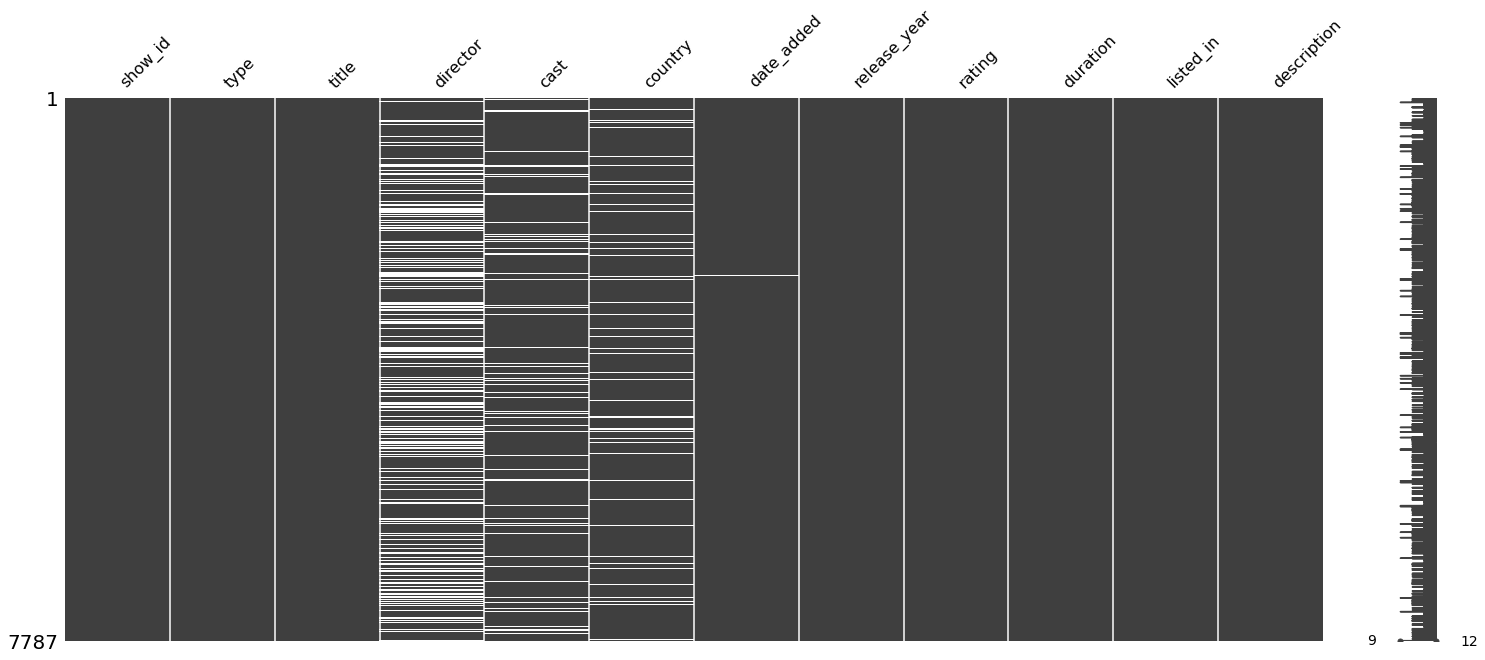

In [7]:
msno.matrix(df)

<AxesSubplot:>

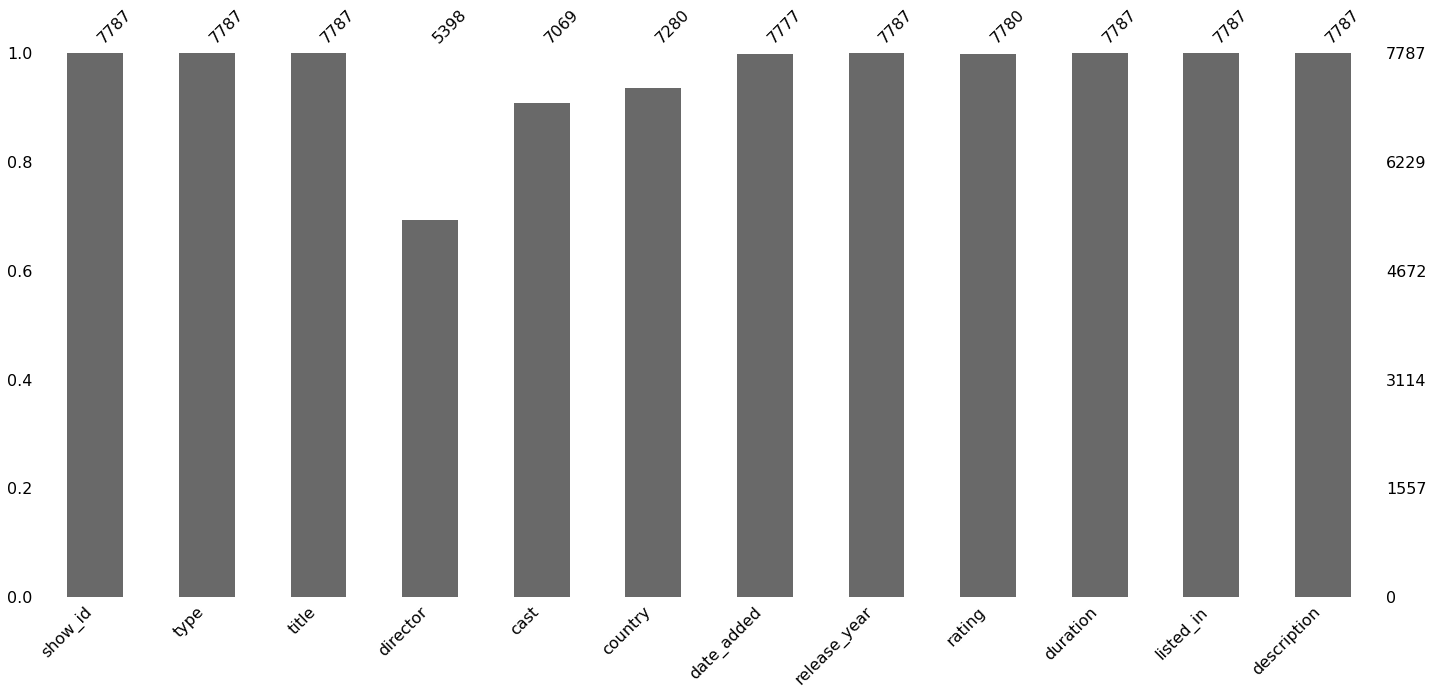

In [8]:
msno.bar(df)

<AxesSubplot:>

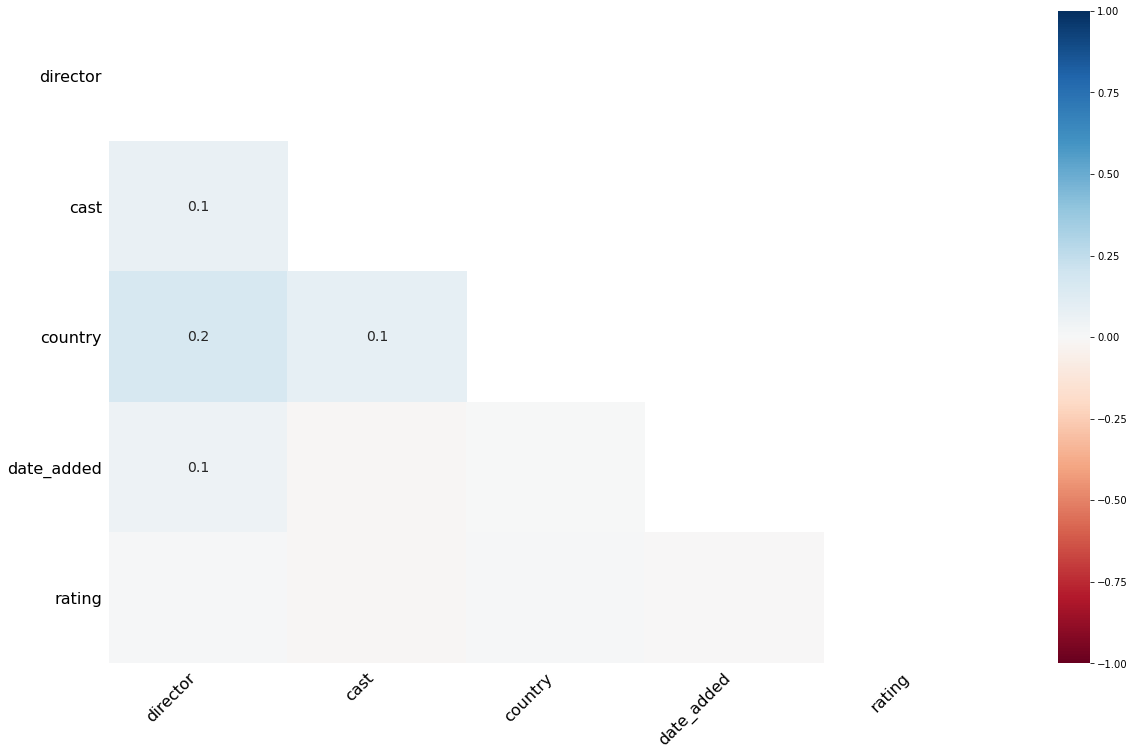

In [9]:
msno.heatmap(df)

#### Conclusão sobre qualidade dos dados:

Por um dataset relativamente pequeno com 7787 dados, existe uma consideravel falta de dados principalmente em Directors, Cast e Country sucessivamente. Porém não é observado nenhuma correlação forte entre as colunas faltantes, o que indicaria uma possível falha sistemática de preenchimento.

Outro ponto importante é o tratamento dos dados faltantes que por serem dados categóricas e proporcionalmente relevantes poderiam adicionar um viés consideravel, desta forma serão analisados os dados disponíveis sem interferência.

In [10]:
print('Inicio :',df.date_added.min(),'Final :', df.date_added.max())

Inicio : 2008-01-01 00:00:00 Final : 2021-01-16 00:00:00


### Contexto temporal.

Antes das análises de feautres, importante entender qual contexto temporal do dataset.

Através das datas de adição dos conteúdos no Netflix

Inicio : 2008-01-01 00:00:00 Final : 2021-01-16 00:00:00

In [11]:
df.date_added = pd.to_datetime(df.date_added)

In [12]:
print('Inicio :',df.date_added.min(),'Final :', df.date_added.max())

Inicio : 2008-01-01 00:00:00 Final : 2021-01-16 00:00:00


In [13]:
df.date_added.describe(datetime_is_numeric=True)

count                             7777
mean     2019-01-02 19:20:57.708627712
min                2008-01-01 00:00:00
25%                2018-02-01 00:00:00
50%                2019-03-08 00:00:00
75%                2020-01-20 00:00:00
max                2021-01-16 00:00:00
Name: date_added, dtype: object

In [14]:
# Criar coluna ano para facilitar futuramente nas plotagens".

df['year_added'] = df.date_added.dt.year

### Type

Existem dois tipos principais de conteúdos no dataset: Movie e TV Show, nesta seção serão observados qual proporção dos dois nos contéudos adicionados na plataforma

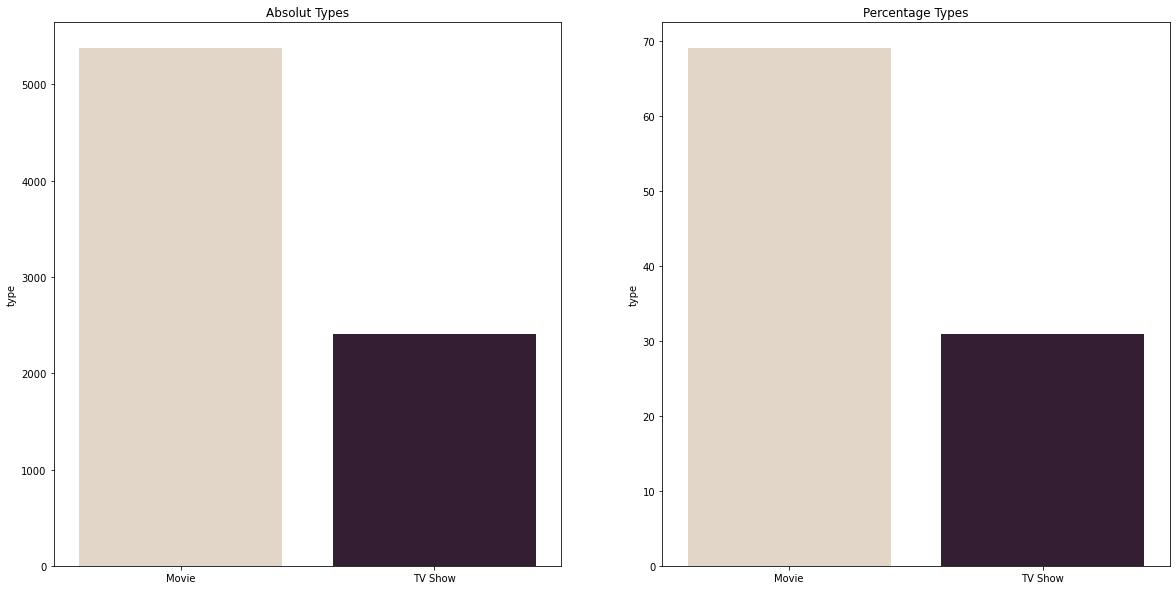

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.set_palette(sns.color_palette(as_cmap=True))

sns.barplot(ax=ax1,x=df['type'].value_counts().index ,y = df['type'].value_counts(),palette="ch:.25").set_title('Absolut Types');

sns.barplot(ax=ax2,x=df['type'].value_counts().index ,y = df['type'].value_counts(normalize=True)*100,palette="ch:.25").set_title('Percentage Types');


In [99]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [16]:
df.type.value_counts(normalize=True)*100

Movie      69.050982
TV Show    30.949018
Name: type, dtype: float64

Como foram acumulados os tipos de conteúdo ao longo do tempo ? 

In [17]:
df_plot = df.groupby(["year_added","type"], as_index=False).count()

In [18]:
df_plot.sample(5)

,year_added,type,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
19,2019.0,TV Show,656,656,36,584,571,656,656,656,656,656,656
21,2020.0,TV Show,697,697,74,597,639,697,697,697,697,697,697
5,2012.0,Movie,3,3,3,3,3,3,3,3,3,3,3
2,2009.0,Movie,2,2,2,2,2,2,2,2,2,2,2
1,2008.0,TV Show,1,1,0,0,1,1,1,1,1,1,1


In [19]:
df_plot.to_csv('df_plot.csv',index=False)

<AxesSubplot:xlabel='year_added', ylabel='show_id'>

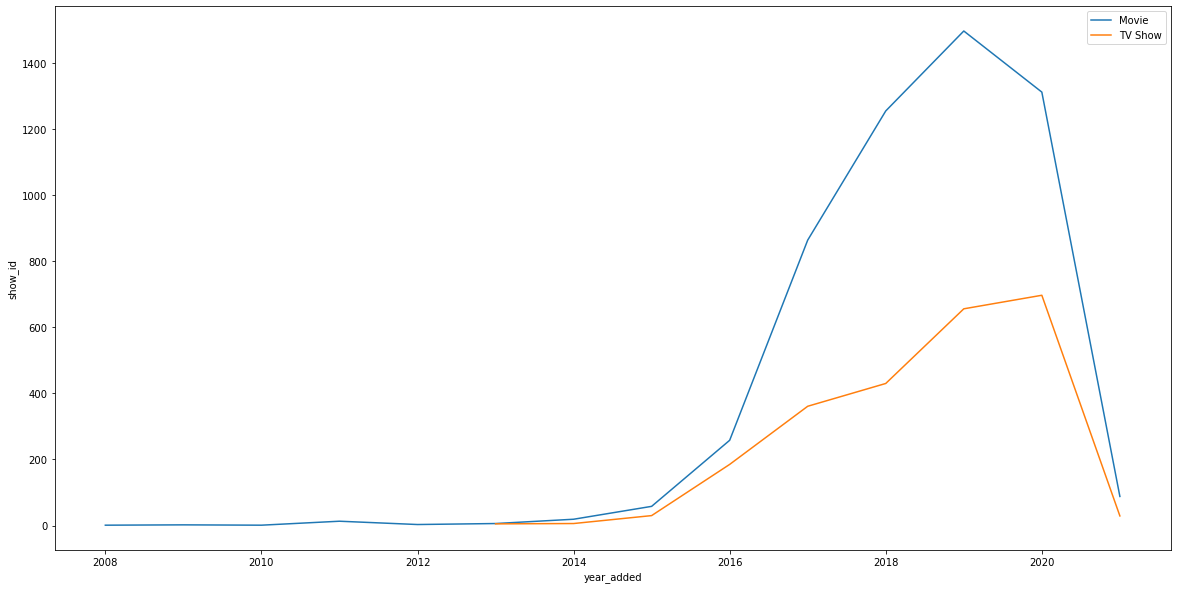

In [20]:
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(data=df_plot,x=df_plot.year_added,y=df_plot.show_id.loc[df_plot.type=="Movie"],hue='type')
sns.lineplot(data=df_plot,x=df_plot.year_added,y=df_plot.show_id.loc[df_plot.type=="TV Show"])

Qual a razão de produção filme/tv show ao longo dos anos ?

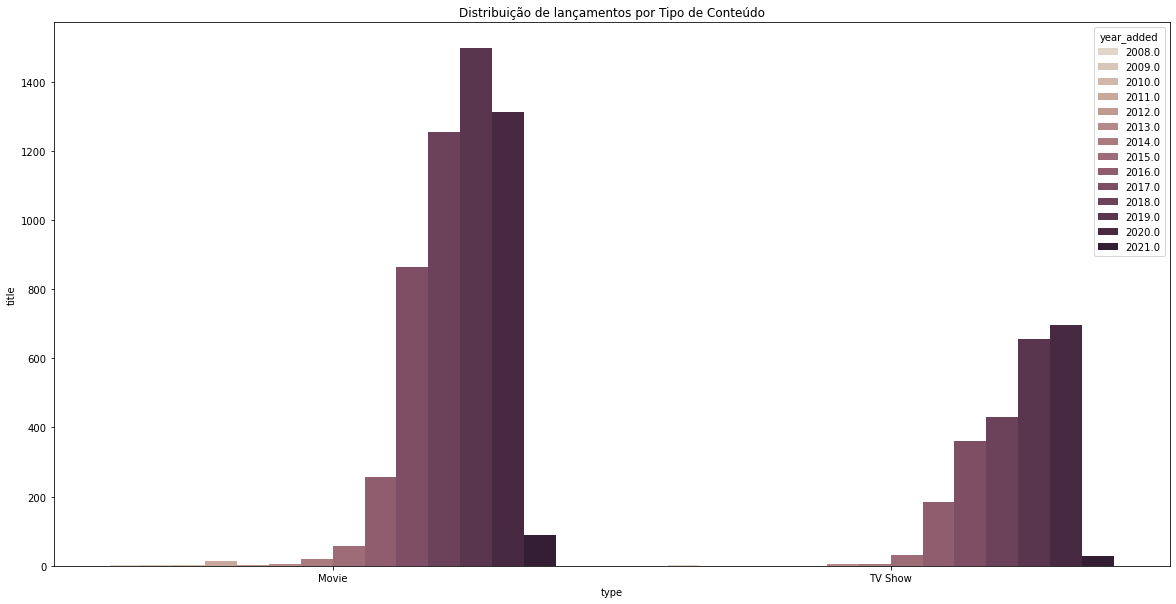

In [21]:
fig = plt.subplots(figsize=(20, 10))
sns.barplot(data=df_plot, x = 'type', y= 'title',hue='year_added',palette="ch:.25").set_title('Distribuição de lançamentos por Tipo de Conteúdo');

In [22]:
df['date_added'].dt.year.value_counts(normalize=True)*100

2019.0    27.684197
2020.0    25.832583
2018.0    21.666452
2017.0    15.751575
2016.0     5.696284
2021.0     1.504436
2015.0     1.131542
2014.0     0.321461
2011.0     0.167160
2013.0     0.141443
2012.0     0.038575
2009.0     0.025717
2008.0     0.025717
2010.0     0.012858
Name: date_added, dtype: float64

### Conclusão sobre os types:


Hoje no portifólio da empresa, os filmes representam 69% do conteúdo disponível, enquanto TV Show representa 31%.

Ao longo dos anos vem adicionando titulos, sendo que estes foram mais expressivamente adicionados a partir de 2014, antes disso a empresa tinha uma adição de conteúdo bem pouco 
expressiva.
Os Filmes são o conteúdo mais adicionado ao longo dos anos, sempre com os TV-Shows com menor adição, o que levou a empresa ao cenário atual de portifólio. Mais filmes do que TV Shows.

- Será que essa proporção atende o gosto atual do público ?
- Até que ponto a Netflix conseguiu linkar a adição ao gosto do público ?

Sobre a adição de conteúdo nos anos disponíveis, a empresa havia adicionado até 2019 quase que exponecialmente conteúdo, principalmente para os filmes, sendo que o ano de maior para filmes foi em 2019 e 2020 a empresa chegou no ponto máximo de adição de séries.

2021 não deve ser utilizado como comparação pois como estamos analisando os anos, ainda possui um espaço temporal muito menor.


### Title 

São todos os titles do conteúdos gerados,comparando eles com IMDb rating

#### Importando dados de Top 250, TV-Shows e Movies:

Fontes:
    
    https://www.imdb.com/chart/top/?ref_=nv_mv_250
        
    https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250 


In [70]:
df_tv_250 = pd.read_csv('D:\Data Scientist\Accenture_Case\Data\Top250_IMDb_tvshows.csv',sep=';')

In [85]:
# Padronizando a string:
df_tv_250['title'] = df_tv_250['title'].apply(lambda x : x.strip().capitalize()) 

In [71]:
df_tv_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          250 non-null    object 
 1   title_details  250 non-null    object 
 2   	IMDb Rating   250 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [72]:
df_mov_250 = pd.read_csv('D:\Data Scientist\Accenture_Case\Data\Top250_IMDb_movies.csv',sep=';')

In [82]:
# Padronizando a string:
df_mov_250['title'] = df_mov_250['title'].apply(lambda x : x.strip().capitalize()) 

In [73]:
df_mov_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          250 non-null    object 
 1   title_details  250 non-null    object 
 2   	IMDb Rating   250 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [80]:
# Padronizando a string:

df['title'] = df['title'].apply(lambda x : x.strip().capitalize()) 

In [81]:
df.title

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu man in japan
7785                      Zumbo's just desserts
7786    Zz top: that little ol' band from texas
Name: title, Length: 7787, dtype: object

In [83]:
df_bool_mov = df.title.isin(df_mov_250.title)

### Número de filmes que a netflix contém que estão no top 250 IMDb.

In [84]:
df_bool_mov.value_counts()

False    7734
True       53
Name: title, dtype: int64

### Número de tv-shows que a netflix contém que estão no top 250 IMDb.

In [87]:
df_bool_tv = df.title.isin(df_tv_250.title)

In [88]:
df_bool_tv.value_counts()

False    7717
True       70
Name: title, dtype: int64

Em 2019 foi o ano de maior adição de títulos TV Show + Movies, seguido por 2020 e 2018:

### Director

É a categoria com maior quantidade de valores faltantes, vamos observar os principais diretores por volume de conteúdo.

In [24]:
df['director'].value_counts(normalize=True)*100

Raúl Campos, Jan Suter             0.333457
Marcus Raboy                       0.296406
Jay Karas                          0.259355
Cathy Garcia-Molina                0.240830
Martin Scorsese                    0.222305
                                     ...   
Cecilia Atán, Valeria Pivato       0.018525
Zoe Lister-Jones                   0.018525
Jacques Perrin, Jacques Cluzaud    0.018525
Brendan Byrne                      0.018525
Don Bluth                          0.018525
Name: director, Length: 4049, dtype: float64

Nenhum diretor possui uma porcentagem expressiva dos conteúdos publicados, mas sim é possível perceber que existem alguns principais;

Quais são os top 10 dos diretores em volume ?

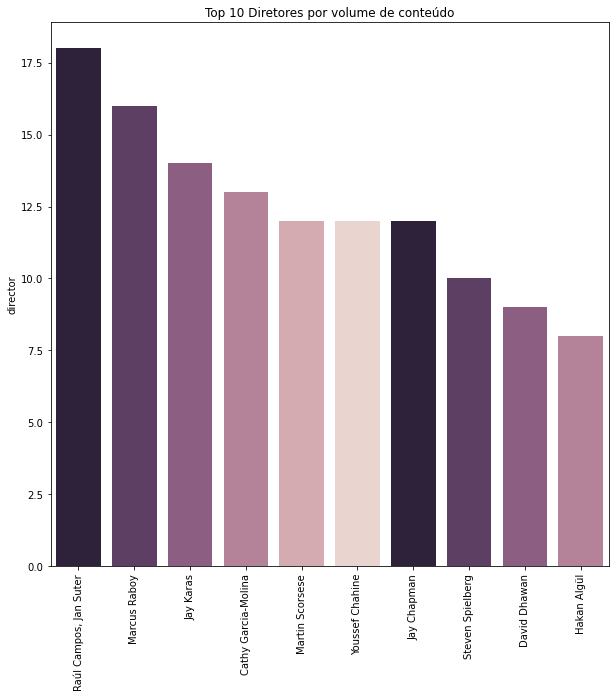

In [27]:
fig = plt.subplots( figsize=(10, 10))
sns.barplot(x=df['director'].value_counts().head(10).index ,y = df['director'].value_counts().head(10),palette=col).set_title('Top 10 Diretores por volume de conteúdo');
plt.xticks(rotation=90);

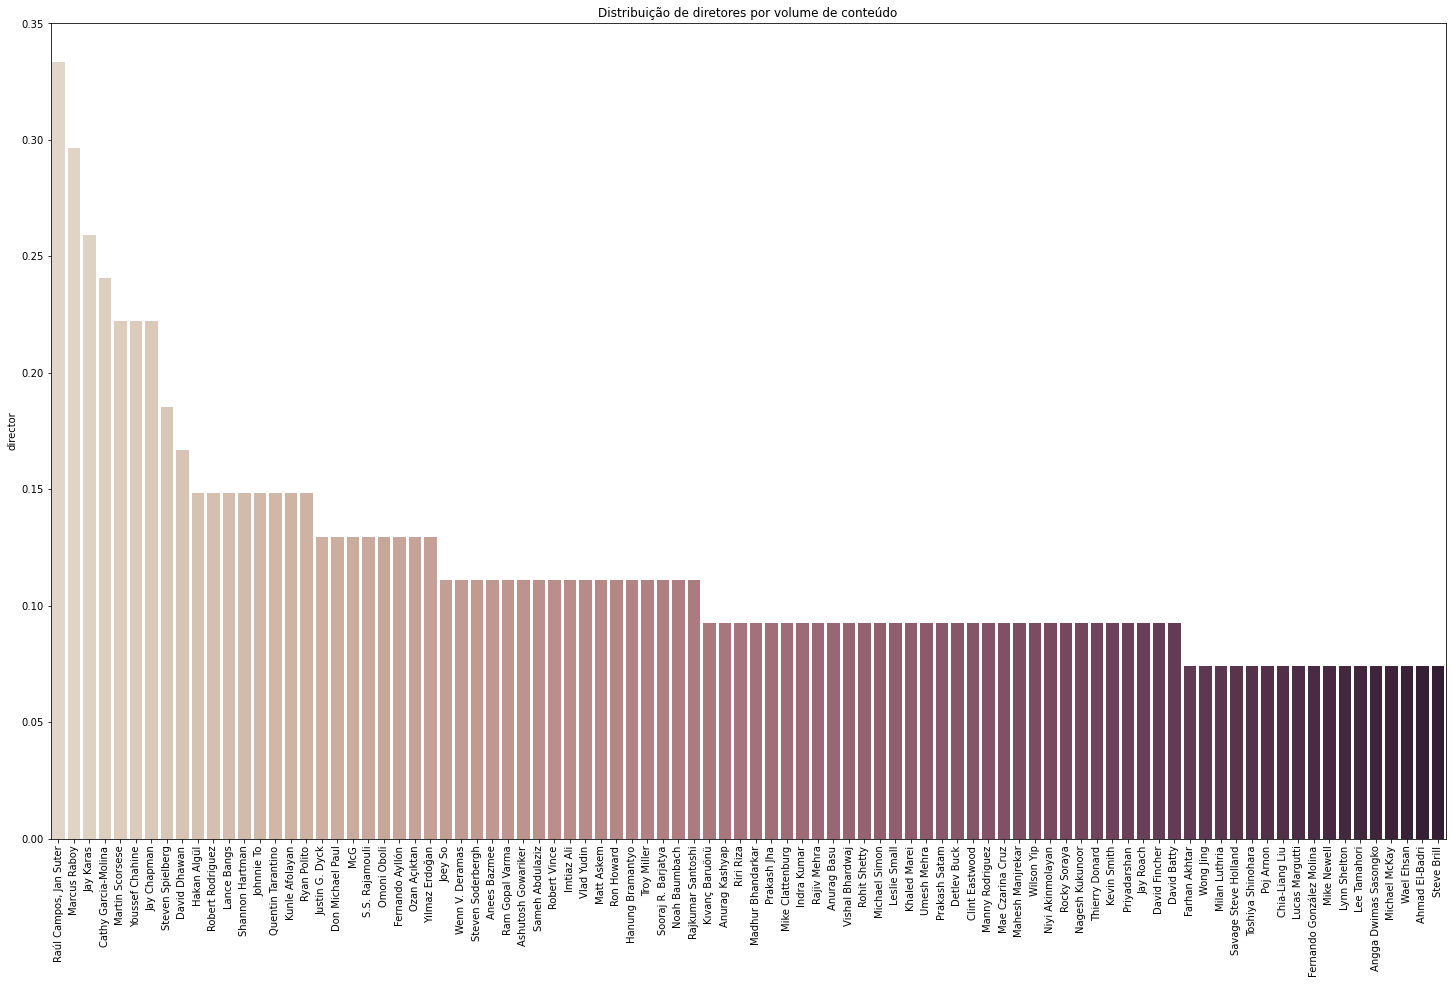

In [28]:
fig = plt.subplots( figsize=(25, 15))

sns.barplot(x=df['director'].value_counts().head(90).index ,y = df['director'].value_counts(normalize=True).head(90)*100,palette="ch:.25").set_title('Distribuição de diretores por volume de conteúdo');
plt.xticks(rotation=90);

### TOP 3 Director Análise

In [29]:
df_raul = df.loc[df['director']=='Raúl Campos, Jan Suter',['director','type','country','listed_in','rating']]
df_marcus = df.loc[df['director']=='Marcus Raboy',['director','type','country','listed_in','rating']]
df_jay = df.loc[df['director']=='Jay Karas',['director','type','country','listed_in','rating']]

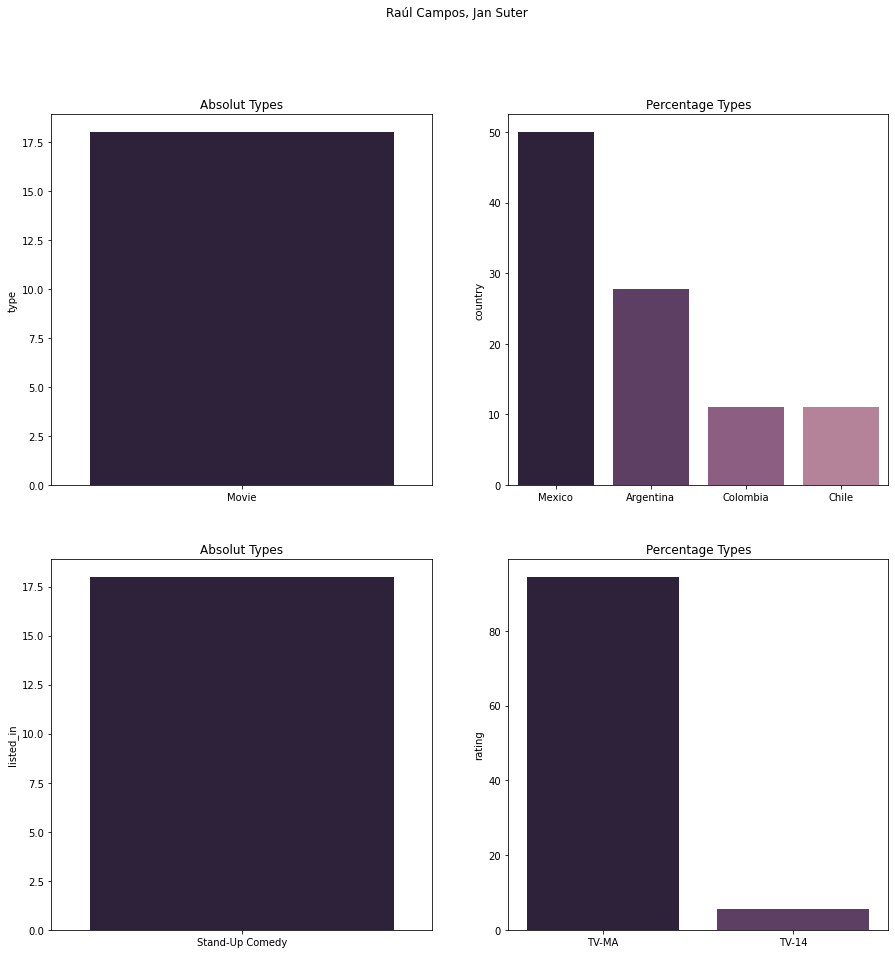

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Raúl Campos, Jan Suter')

sns.barplot(ax=ax1,x=df_raul['type'].value_counts().index ,y = df_raul['type'].value_counts(),palette=col).set_title('Absolut Types');

sns.barplot(ax=ax2,x=df_raul['country'].value_counts().index ,y = df_raul['country'].value_counts(normalize=True)*100,palette=col).set_title('Percentage Types');

sns.barplot(ax=ax3,x=df_raul['listed_in'].value_counts().index ,y = df_raul['listed_in'].value_counts(),palette=col).set_title('Absolut Types');

sns.barplot(ax=ax4,x=df_raul['rating'].value_counts().index ,y = df_raul['rating'].value_counts(normalize=True)*100,palette=col).set_title('Percentage Types');

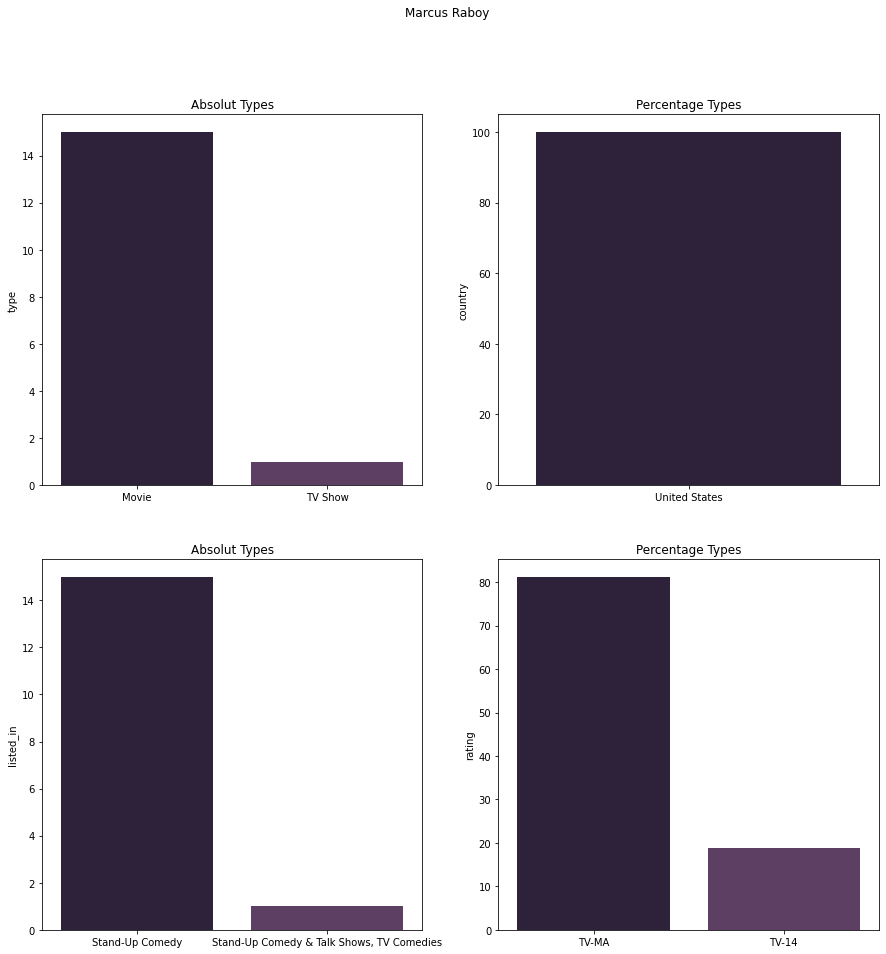

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Marcus Raboy')

sns.barplot(ax=ax1,x=df_marcus['type'].value_counts().index ,y = df_marcus['type'].value_counts(),palette=col).set_title('Absolut Types');

sns.barplot(ax=ax2,x=df_marcus['country'].value_counts().index ,y = df_marcus['country'].value_counts(normalize=True)*100,palette=col).set_title('Percentage Types');

sns.barplot(ax=ax3,x=df_marcus['listed_in'].value_counts().index ,y = df_marcus['listed_in'].value_counts(),palette=col).set_title('Absolut Types');

sns.barplot(ax=ax4,x=df_marcus['rating'].value_counts().index ,y = df_marcus['rating'].value_counts(normalize=True)*100,palette=col).set_title('Percentage Types');

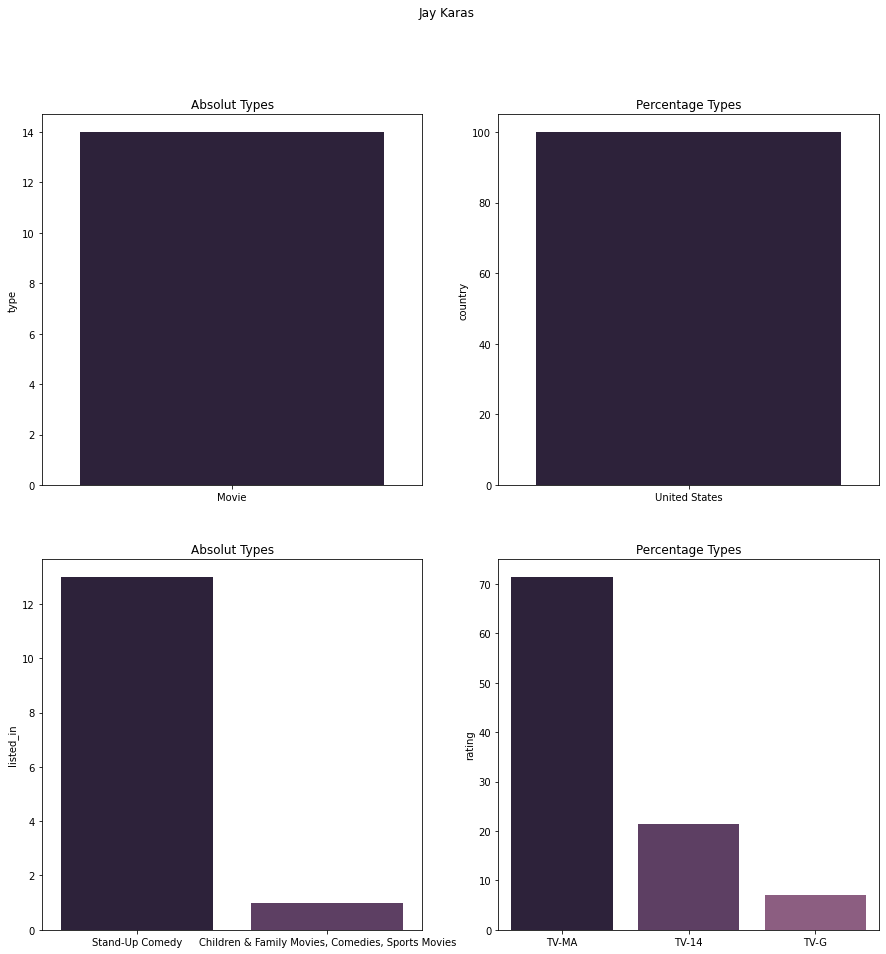

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Jay Karas')

sns.barplot(ax=ax1,x=df_jay['type'].value_counts().index ,y = df_jay['type'].value_counts(),palette=col).set_title('Absolut Types');

sns.barplot(ax=ax2,x=df_jay['country'].value_counts().index ,y = df_jay['country'].value_counts(normalize=True)*100,palette=col).set_title('Percentage Types');

sns.barplot(ax=ax3,x=df_jay['listed_in'].value_counts().index ,y = df_jay['listed_in'].value_counts(),palette=col).set_title('Absolut Types');

sns.barplot(ax=ax4,x=df_jay['rating'].value_counts().index ,y = df_jay['rating'].value_counts(normalize=True)*100,palette=col).set_title('Percentage Types');

Os filmes do diretor 'Raúl Campos, Jan Suter' foram os mais adicionados durante este período sendo que todos são relacionados a Stand-Up Comedy e voltado ao publico adulto! ? TV-MA

### Conclusão sobre Diretores dos conteúdos:

Não existe um diretor com uma porcentagem expressiva dos conteúdos, mas sim existem alguns que possuem uma porcentagem relativa maior.

Entre os três principais diretores:
    
   #### -   Raúl Campos, Jan Suter: 
    
    Possui a totalidade dos seus conteúdos como filmes, sendo eles produzidos em diferentes países: México, Argentina, Colombia e Chile ( em ordem decrescente de volume )
    
    Todo seu conteúdo na Netflix é categorizado como Stand-Up Comedy, classificados em sua maioria 90% para adultos > 18 (TV-MA) e sua minoria 10% para (TV-14) acima de 14 anos.
    
   #### -  Marcos Raboy: 
    
    Possui a maioria dos seus conteúdos (14) como filmes e 1 deles apenas como TV Show, todos eles apenas produzidos nos Estados Unidos 
    
    Todo seu conteúdo na Netflix é categorizado como Stand-Up Comedy, classificados em sua maioria 80% para adultos > 18 (TV-MA) e sua minoria 20% para (TV-14) acima de 14 anos.
    
   #### -  Jay Karas: 
    
    Possui a totalidade dos seus conteúdos como filmes, todos eles apenas produzidos nos Estados Unidos.
    
    Seu conteúdo é voltado para Comedia, com a maioria categorizada Stand-Up Comedy e 1 deles como filme de comédia, classificados em sua maioria 70% para adultos > 18 (TV-MA), 20%
    para (TV-14) acima de 14 anos e 10 % aproximadamente para o público em geral.

### Cast 

Sobre o elenco, seria interessante encontrar os principais atores ou nomes que aparecem no conteúdo netflix, possui algum ator, elenco predominante ?

Fonte Nuvem Palavras: https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/

In [33]:
df.cast.sample(10)

6568    Luis Aguirre, Andrea Quattrocchi, Silvio Rodas...
5540    Lu Han, Shu Qi, Shi Liang, Godfrey Gao, Wang G...
7445                                           Gay Talese
6802                                       Jermaine Dupri
6116                             Todd Field, Kurt Russell
7547    Yashaswini Dayama, Karanvir Malhotra, Abhay De...
6541    Hee-seon Kim, Seon-a Kim, Sang-hun Jeong, Tae-...
1538    Margot Bancilhon, Laurent Lucas, Stéphane Jobe...
7150    Joep Vermolen, Amy van der Weerden, Loulou Ham...
442                                                   NaN
Name: cast, dtype: object

In [34]:
df.cast = df.cast.astype('string')

In [35]:
df_wordcloud = df.cast.dropna(axis=0)

In [36]:
df_wordcloud.shape

(7069,)

In [37]:
# Concatenando o df.cast em uma string apenas:

all_summary = " ".join(s for s in df_wordcloud)

In [38]:
len(all_summary)

840226

In [39]:
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800).generate(all_summary)

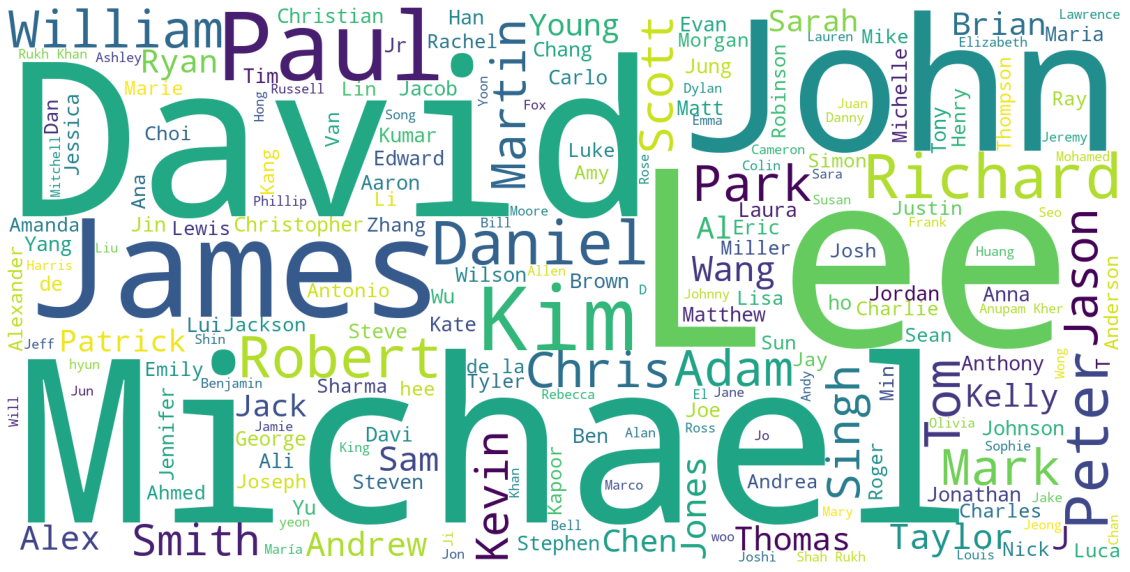

In [40]:
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

Nome que mais aparecem, podemos ver entre eles, Lee, Michael, David, Richard, Paul, John, James, Daniel.

### Conclusão Sobre elenco do conteúdo Netflix:

A análise da frequência de palavras nos da uma noção dos nomes nos elencos que mais aparecem entre eles:  Lee, Michael, David, Richard, Paul, John, James, Daniel.

### Country - Países onde foram produzidos os conteúdos

A ideia é entender, qual dos países mais produzem( produziram) conteúdo para o Netflix, como foi essa evolução ao longo dos anos...

In [41]:
df['country'].value_counts(normalize=True).head(10)*100

United States     35.096154
India             12.678571
United Kingdom     5.453297
Japan              3.104396
South Korea        2.513736
Canada             2.431319
Spain              1.840659
France             1.579670
Egypt              1.387363
Mexico             1.373626
Name: country, dtype: float64

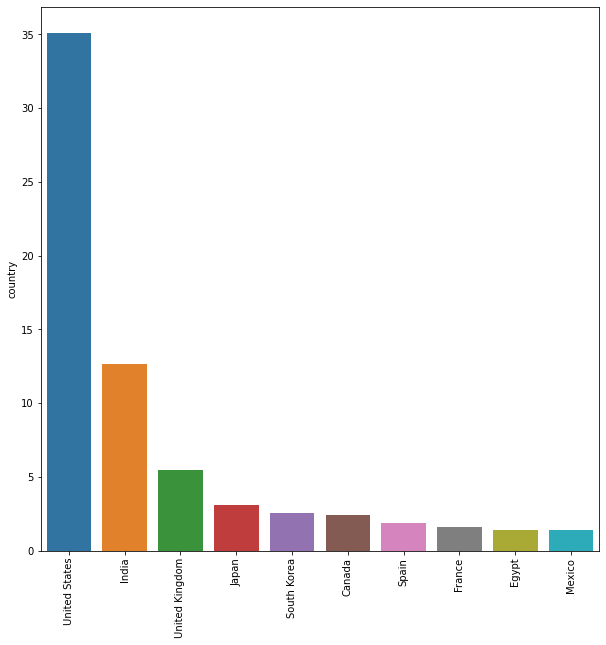

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df['country'].value_counts().head(10).index ,y = df['country'].value_counts(normalize=True).head(10)*100)
plt.xticks(rotation=90);

Podemos observar que os Estados Unidos é o país que mais produz conteúdo lançado no Netflix neste período, seguido pela India em torno de 12% e Reino Unido com 7%; 

Ou seja podemos observar que os Estados Unidos esta bem a frente dos demais países na produção de conteúdo.

In [43]:
df_plot_2 = df.groupby(["country"], as_index=False).count()
df_plot_2.sort_values('title',ascending=False)

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,year_added
549,United States,2555,2555,2555,1838,2251,2549,2555,2552,2555,2555,2555,2549
229,India,923,923,923,848,894,923,923,923,923,923,923,923
462,United Kingdom,397,397,397,201,332,396,397,397,397,397,397,396
291,Japan,226,226,226,78,222,225,226,225,226,226,226,225
394,South Korea,183,183,183,44,180,183,183,183,183,183,183,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,"Indonesia, South Korea, Singapore",1,1,1,1,1,1,1,1,1,1,1,1
253,"Indonesia, United Kingdom",1,1,1,1,1,1,1,1,1,1,1,1
254,"Indonesia, United States",1,1,1,1,1,1,1,1,1,1,1,1
255,"Iran, France",1,1,1,1,1,1,1,1,1,1,1,1


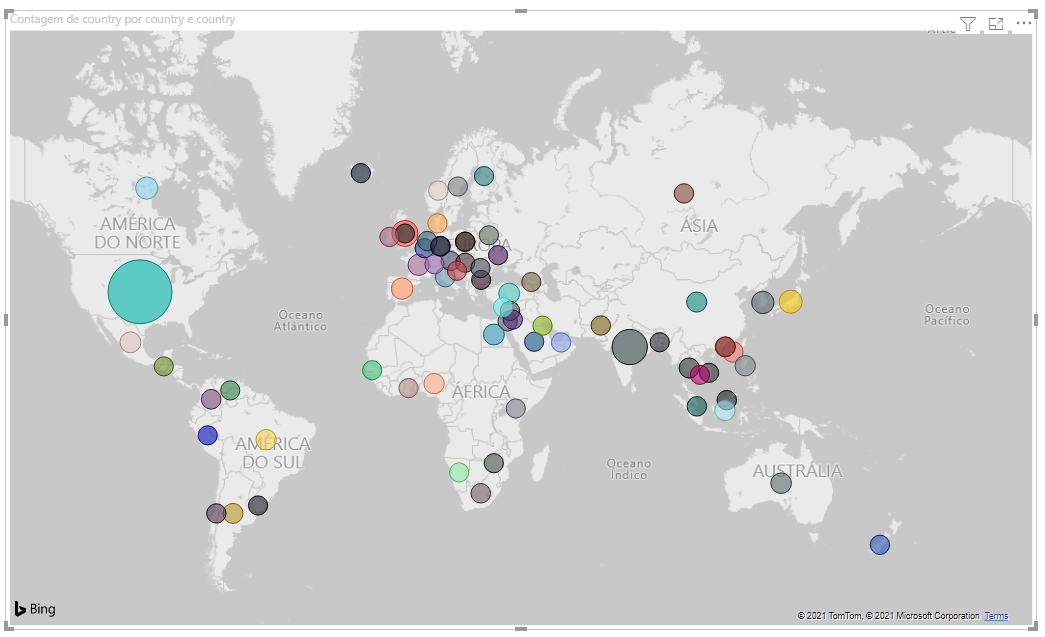

#### Conclusão sobre Países produzindo conteúdo p/ Netflix

Ao longo dos anos o Netflix vem expandindo e diversificando a seu conteúdo em relação aos países que o produzem, apesar de ainda ter 35% do seu conteúdo como Americano, seguido pela India 12,5% e Reino Unido 5%.

### Date_added and Release_year

Um ponto interessante das duas variáveis é qual idade dos conteúdos ? Estamos falando de conteúdos novos sendo adicionados ou titulos mais antigos ?

Date_added, quando os filmes foram adicionados no Netflix,  e o Release_year quando foram liberados ao público.

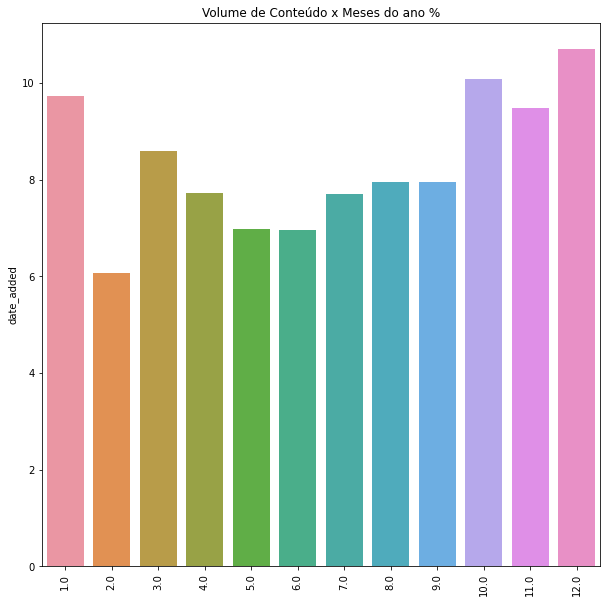

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df['date_added'].dt.month.value_counts(normalize=True).index ,y = df['date_added'].dt.month.value_counts(normalize=True)*100).set_title('Volume de Conteúdo x Meses do ano %');
plt.xticks(rotation=90);

In [45]:
# Criando coluna que contém idade dos filmes !

df['content_age_rel'] = df['year_added'] - df['release_year'] # data relativa, ou seja no ano de lançamento qual idade dos filmes

Podemos considerar que todos valores <-3 ou seja onde foram adicionados antes de ser liberados ao público tem na verdade 0 anos ! É um filme novo.

In [46]:
df['content_age_rel'].loc[df['content_age_rel']<0]=0

C:\Users\rodri\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


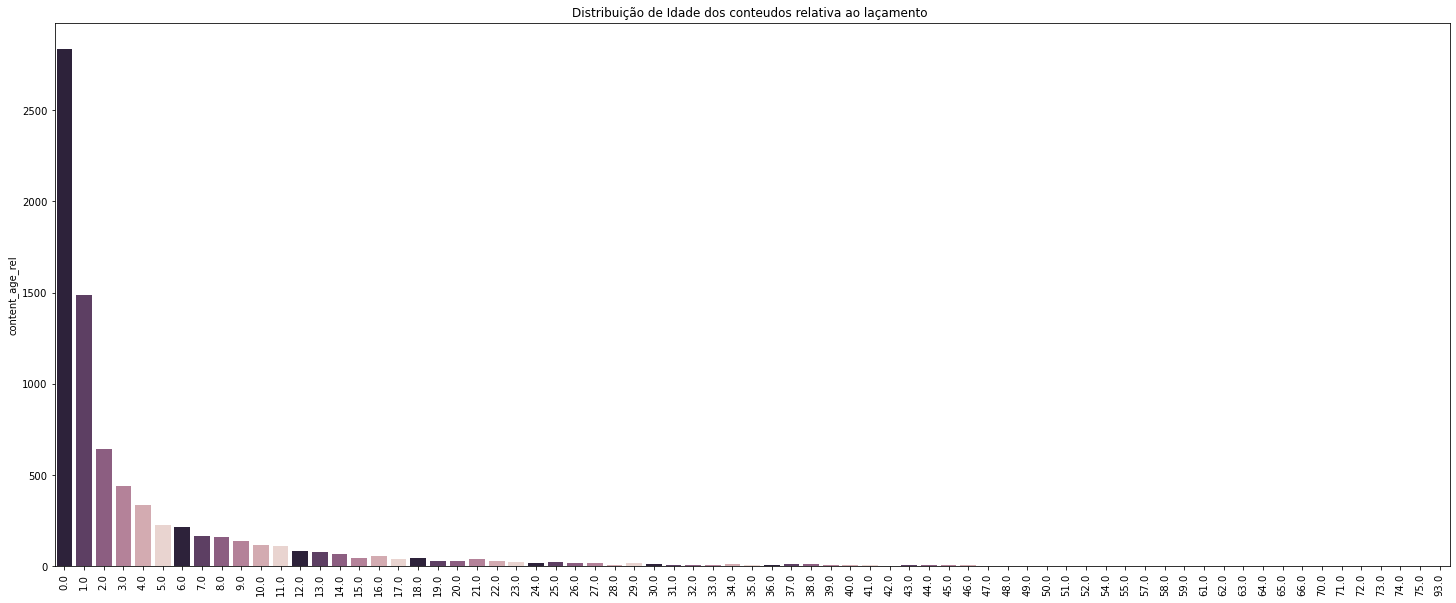

In [47]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=df['content_age_rel'].value_counts().index ,y = df['content_age_rel'].value_counts(),palette=col).set_title('Distribuição de Idade dos conteudos relativa ao laçamento ');
plt.xticks(rotation=90);

In [48]:
df['content_age'] = 2021 - df['release_year'] # Idade atual do portifólio Netflix

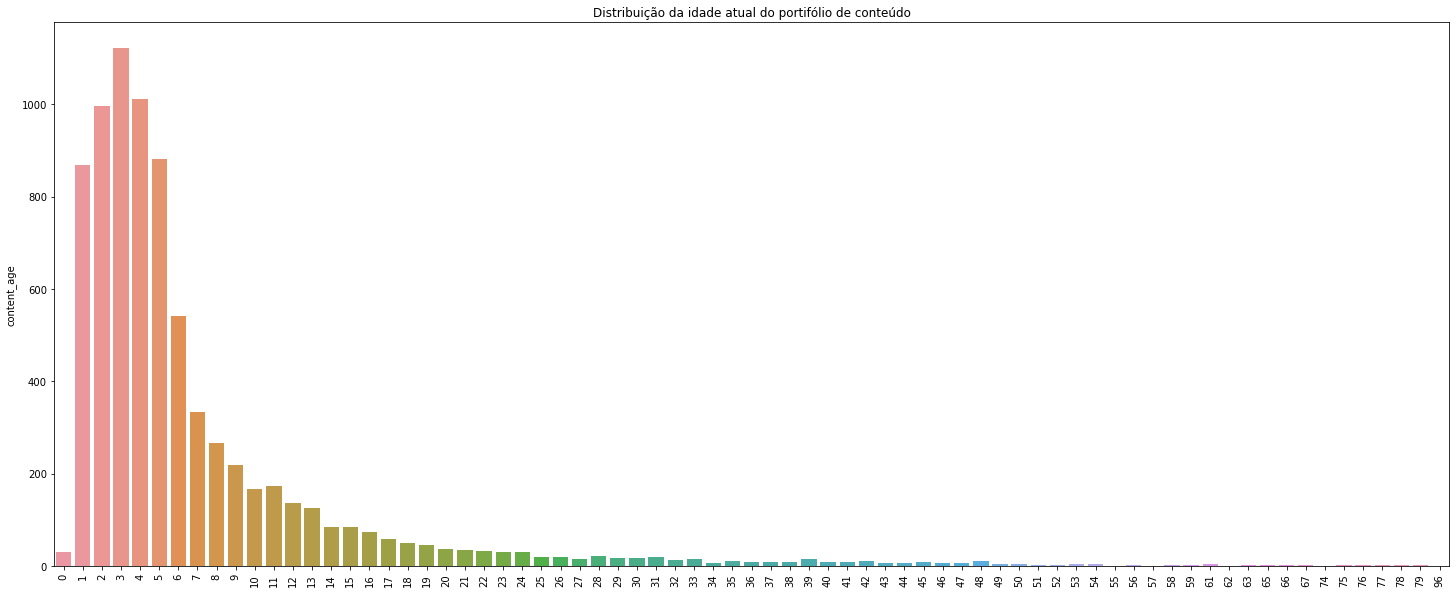

In [49]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=df['content_age'].value_counts().index ,y = df['content_age'].value_counts()).set_title('Distribuição da idade atual do portifólio de conteúdo');
plt.xticks(rotation=90);

C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='content_age'>

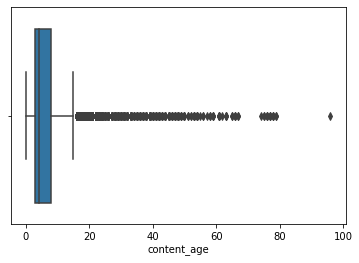

In [50]:
sns.boxplot(df['content_age'])

In [51]:
df['content_age'].describe()

count    7787.000000
mean        7.067420
std         8.757395
min         0.000000
25%         3.000000
50%         4.000000
75%         8.000000
max        96.000000
Name: content_age, dtype: float64

#### Conclusão Sobre Data_added e release_date:


De uma forma geral desde o ínicio das observações, podemos ver que o mês de dezembro é onde tem maior % de adições de conteúdo na plataforma;
De outubro a fevereiro são os mêses de maior adições. O menor mês em volume é fevereiro. Pode indicar alguma estratégia, como por exemplo período de férias, onde se torna
atrativo para mais pessoas e a plataforma decide aumentar o conteúdo.

### - Idade Relativa Conteúdo:
Tem objetivo de mostrar o quando a Netflix adiciona conteúdo novo a plataforma, ou seja que tenham sido lançados com a Netflix ou próximos, isso mostra o grau de novidade do portifólio. Que se concretiza ao mostrar maior frequência de idade relativa em 0 ou seja logo que lançou era novidade! 

### - Idade Atual do Conteúdo:

É possível obserar que a maior parte do conteúdo tem 3 anos de forma que 75% do seu protifólio contém até 8 anos e metade 4 anos ou menos.

## Rating 

Rating tem a função de classificar de forma apropriada a idade ou faixa etaria correta para o público.

Existem duas nomenclaturas distintas de classificações para: TV Show e Movie:

Fonte: https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ

### -  TV Show:

- TV-MA (Mature Audiences Only) >18 *
- TV-14 (Parents Strongly Cautioned) >16*
- TV-PG (Parental Guidance Suggested) >7 *
- TV-G (General Audience) >0 *
- TV-Y7 (Directed To Older Children) >7 *
- TV-Y (All Children) >0 *
- TV-Y7-FV - (Directed To Older Children) >7 *

### -  Movie:

- G - General Audiences - General > 0 *
- PG - Parental Guidance Suggested > 7 *
- PG-13 -Parents Strongly Cautioned > 13*
- R - Restricted > 18 *
- NC-17 No One 17 and under admitted > 17 *
- NR > 18 *
- UR >18 Não Classificado!*

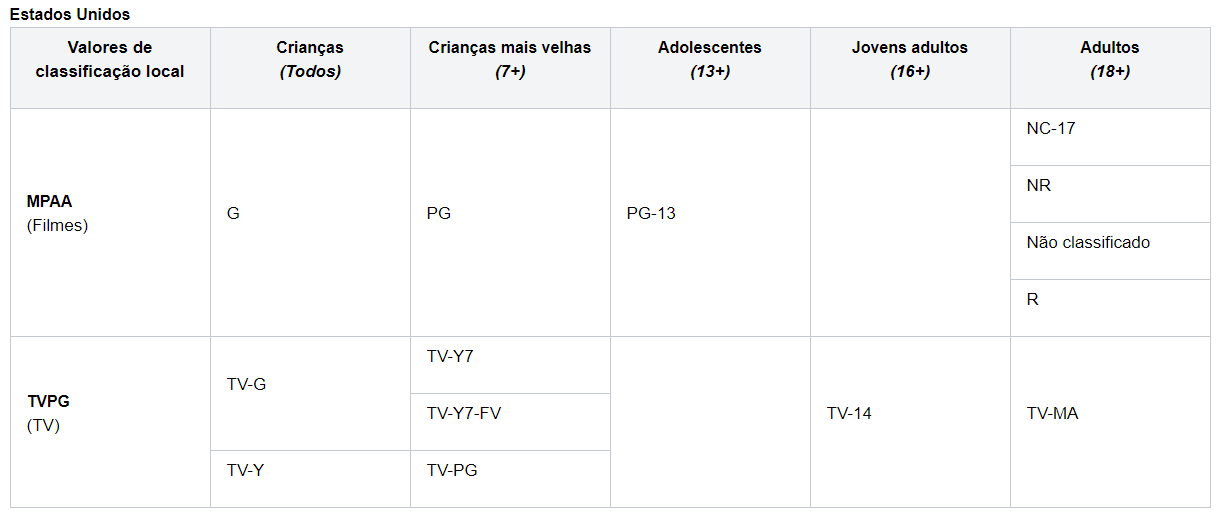

Sendo assim qual a situação atual do portifólio em relação a filmes e tv shows ?

In [52]:
# Criando coluna contendo dados categóricos dividindo em público: Crianças(Todos), Crianças Mais Velhas (+7), Adolescentes (13+), Jovens adultos (16+), Adultos (18+)
 
# Crianças(Todos): G,TV-G,TV-Y
# Crianças Mais Velhas (+7): PG, TV-Y7, TV-Y7-FV, TV-PG
# Adolescentes (13+): PG-13
# Jovens adultos(16+): TV-14
# Adultos (18+): R, NC-17, NR, UR, TV-MA 

In [53]:
df['cat_rating'] = 0 # Coluna com categorias de rating

In [54]:
df['cat_rating'].loc[df['rating'].isin(['G','TV-G','TV-Y'])]='Crianças(Todos)'

C:\Users\rodri\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [55]:
df['cat_rating'].loc[df['rating'].isin(['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG'])]= 'Crianças Mais Velhas (+7)'

In [56]:
df['cat_rating'].loc[df['rating'].isin(['PG-13'])]='Adolescentes (13+)'

In [57]:
df['cat_rating'].loc[df['rating'].isin(['TV-14'])]='Jovens adultos(16+)'

In [58]:
df['cat_rating'].loc[df['rating'].isin(['R', 'NC-17', 'NR', 'UR', 'TV-MA'])]= 'Adultos(18+)'

In [59]:
# Verificando as subistituições:

df['cat_rating'].isnull().sum()

0

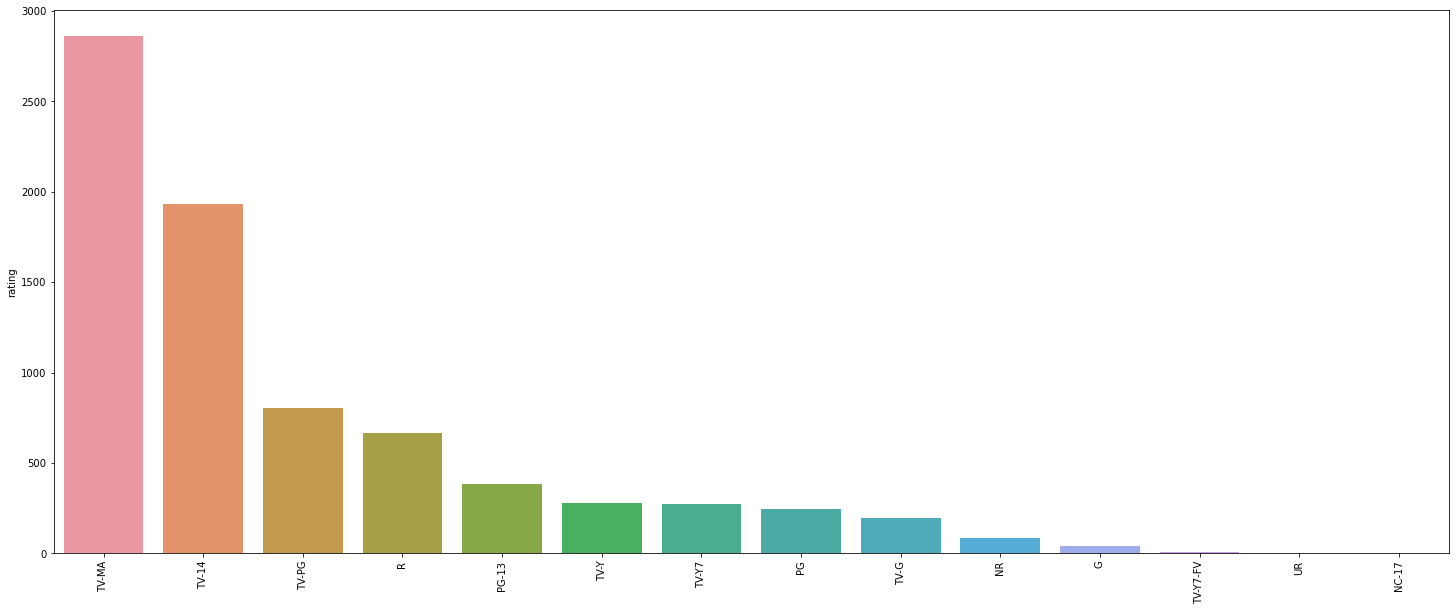

In [60]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=df['rating'].value_counts().index ,y = df['rating'].value_counts())
plt.xticks(rotation=90);

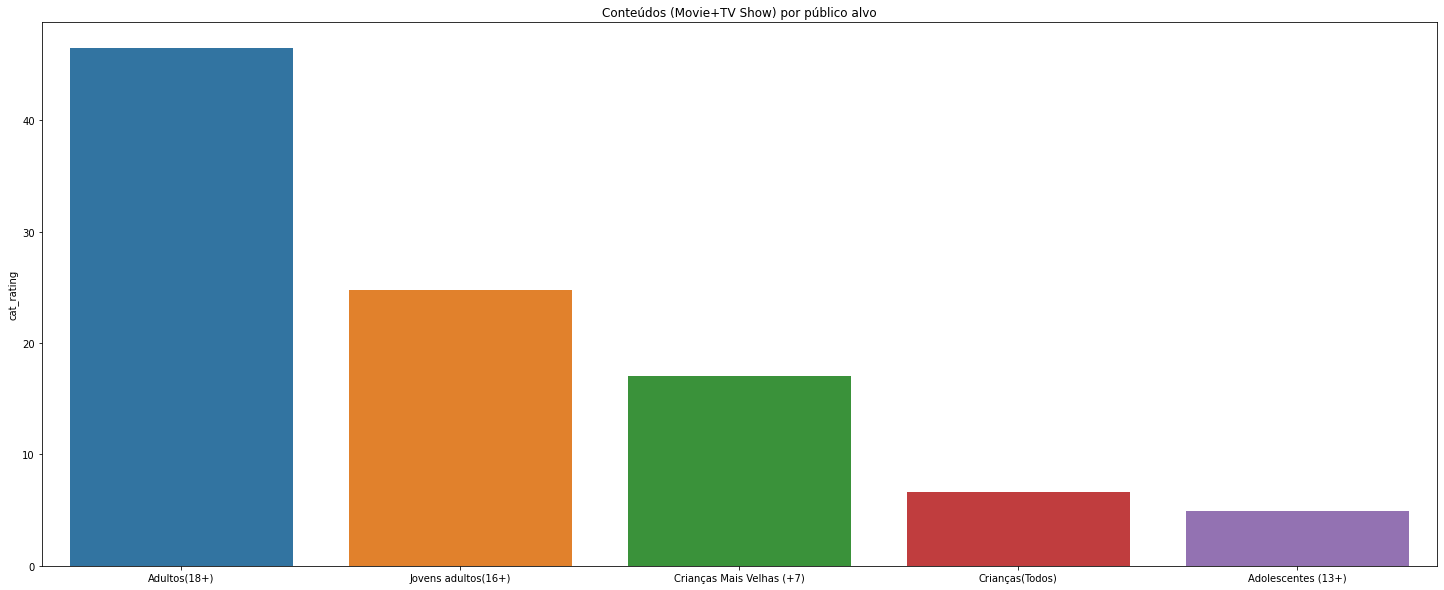

In [61]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=df['cat_rating'].value_counts().index.drop(0) ,y = df['cat_rating'].value_counts(normalize=True).drop(0)*100).set_title('Conteúdos (Movie+TV Show) por público alvo');

In [62]:
df['cat_rating'].value_counts(normalize=True).drop(0)*100

Adultos(18+)                 46.487736
Jovens adultos(16+)          24.797740
Crianças Mais Velhas (+7)    17.079748
Crianças(Todos)               6.587903
Adolescentes (13+)            4.956980
Name: cat_rating, dtype: float64

Como é distribuido o conteúdo em relação a TV-Show ou Movies?

In [63]:
df.loc[df['type']=='Movie','cat_rating']

1                    Adultos(18+)
2                    Adultos(18+)
3              Adolescentes (13+)
4              Adolescentes (13+)
6                    Adultos(18+)
                  ...            
7781    Crianças Mais Velhas (+7)
7782                 Adultos(18+)
7783          Jovens adultos(16+)
7784                 Adultos(18+)
7786                 Adultos(18+)
Name: cat_rating, Length: 5377, dtype: object

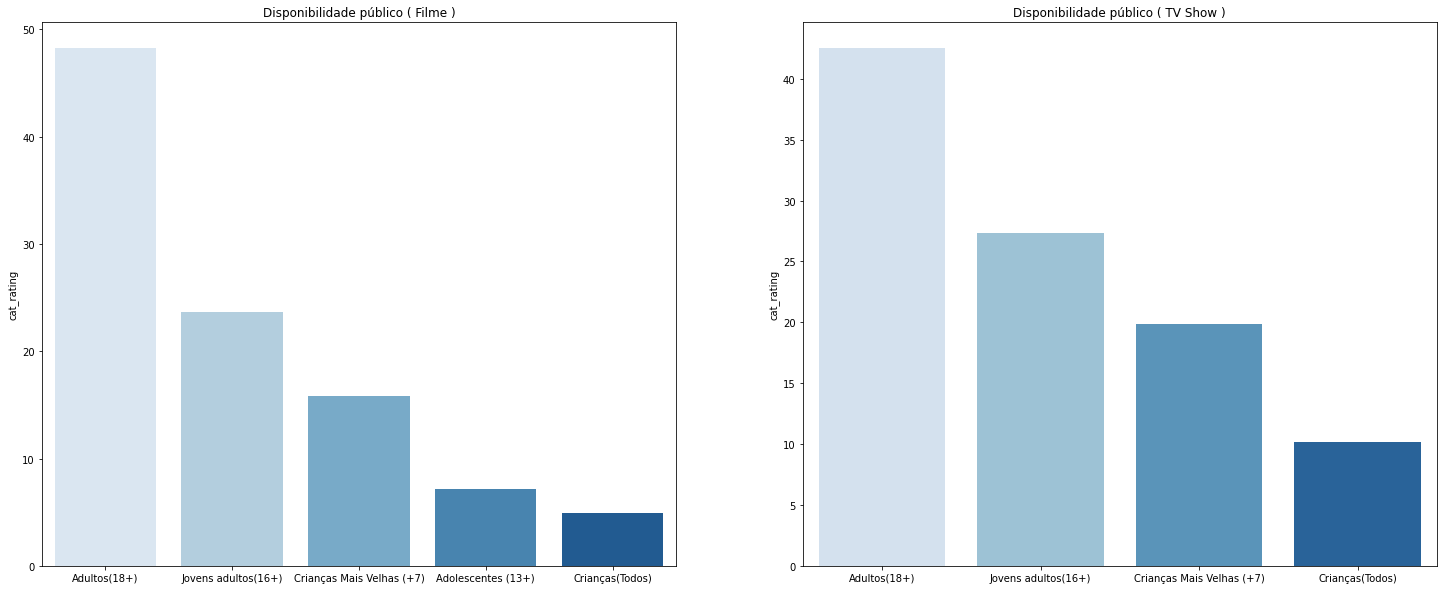

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

sns.barplot(ax=ax1,x=df.loc[df['type']=='Movie','cat_rating'].value_counts().index.drop(0) ,y = df.loc[df['type']=='Movie','cat_rating'].value_counts(normalize=True).drop(0)*100,palette='Blues').set_title('Disponibilidade público ( Filme )');
sns.barplot(ax=ax2,x=df.loc[df['type']=='TV Show','cat_rating'].value_counts().index.drop(0) ,y = df.loc[df['type']=='TV Show','cat_rating'].value_counts(normalize=True).drop(0)*100,palette='Blues').set_title('Disponibilidade público ( TV Show )');

In [65]:
df.loc[df['type']=='Movie','cat_rating'].value_counts(normalize=True).drop(0)*100

Adultos(18+)                 48.261112
Jovens adultos(16+)          23.656314
Crianças Mais Velhas (+7)    15.845267
Adolescentes (13+)            7.178724
Crianças(Todos)               4.965594
Name: cat_rating, dtype: float64

In [66]:
df.loc[df['type']=='TV Show','cat_rating'].value_counts(normalize=True).drop(0)*100

Adultos(18+)                 42.531120
Jovens adultos(16+)          27.344398
Crianças Mais Velhas (+7)    19.834025
Crianças(Todos)              10.207469
Name: cat_rating, dtype: float64

### Conclusão Rating: 

Com as classificações é possível observar a disponibilidade de conteúdo por público, observa-se de forma geral ( filmes + programas de tv) que a maior parte do conteúdo 46%
é restrito para maiores de +18 anos ou seja público adulto seguido de jovens 24% adultos e crianças mais velhas 17%, Crianças(Todos) 6.58% e Adolescentes (13+) 4.95%.

Essas proporções são parecidas quando olhamos isoladamente filmes e tv shows, com a diferença que nos tv shows existe maior disponibilidade de conteúdo para crianças e crianças mais velhas;

Será que essa proporção de conteúdo atende a demanda do público ? Adultos assistem muito mais tv do os outros públicos ?



## Duration

Basicamente existem dois tipos de período de duração na mesma coluna, season para TV-Shows e min para Filmes, dessa forma precisa-se analisa-los de forma independente.

Inicialmente tornado a coluna mais flexível para analise

In [67]:
df[['duration','duration_unit']] = df['duration'].str.split(' ',expand=True) # separando duração x unidade de medida( season, min )

In [68]:
df[['duration','duration_unit']]

,duration,duration_unit
0,4,Seasons
1,93,min
2,78,min
3,80,min
4,123,min
...,...,...
7782,99,min
7783,111,min
7784,44,min
7785,1,Season


In [69]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'content_age_rel', 'content_age', 'cat_rating',
       'duration_unit'],
      dtype='object')

In [70]:
# Reorganizando as colunas

In [71]:
df = df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration','duration_unit', 'listed_in', 'description',
       'year_added', 'content_age', 'content_age_rel', 'cat_rating']]

In [72]:
df.duration = df.duration.astype('float64')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          7787 non-null   object        
 1   type             7787 non-null   object        
 2   title            7787 non-null   object        
 3   director         5398 non-null   object        
 4   cast             7069 non-null   string        
 5   country          7280 non-null   object        
 6   date_added       7777 non-null   datetime64[ns]
 7   release_year     7787 non-null   int64         
 8   rating           7780 non-null   object        
 9   duration         7787 non-null   float64       
 10  duration_unit    7787 non-null   object        
 11  listed_in        7787 non-null   object        
 12  description      7787 non-null   object        
 13  year_added       7777 non-null   float64       
 14  content_age      7787 non-null   int64  

In [74]:
df.to_csv('desafio_mod.csv',index=False)

### Duração do Movie

In [75]:
df.duration = df.duration.astype('float64')

In [76]:
df.duration.describe()

count    7787.000000
mean       69.122769
std        50.950743
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration, dtype: float64

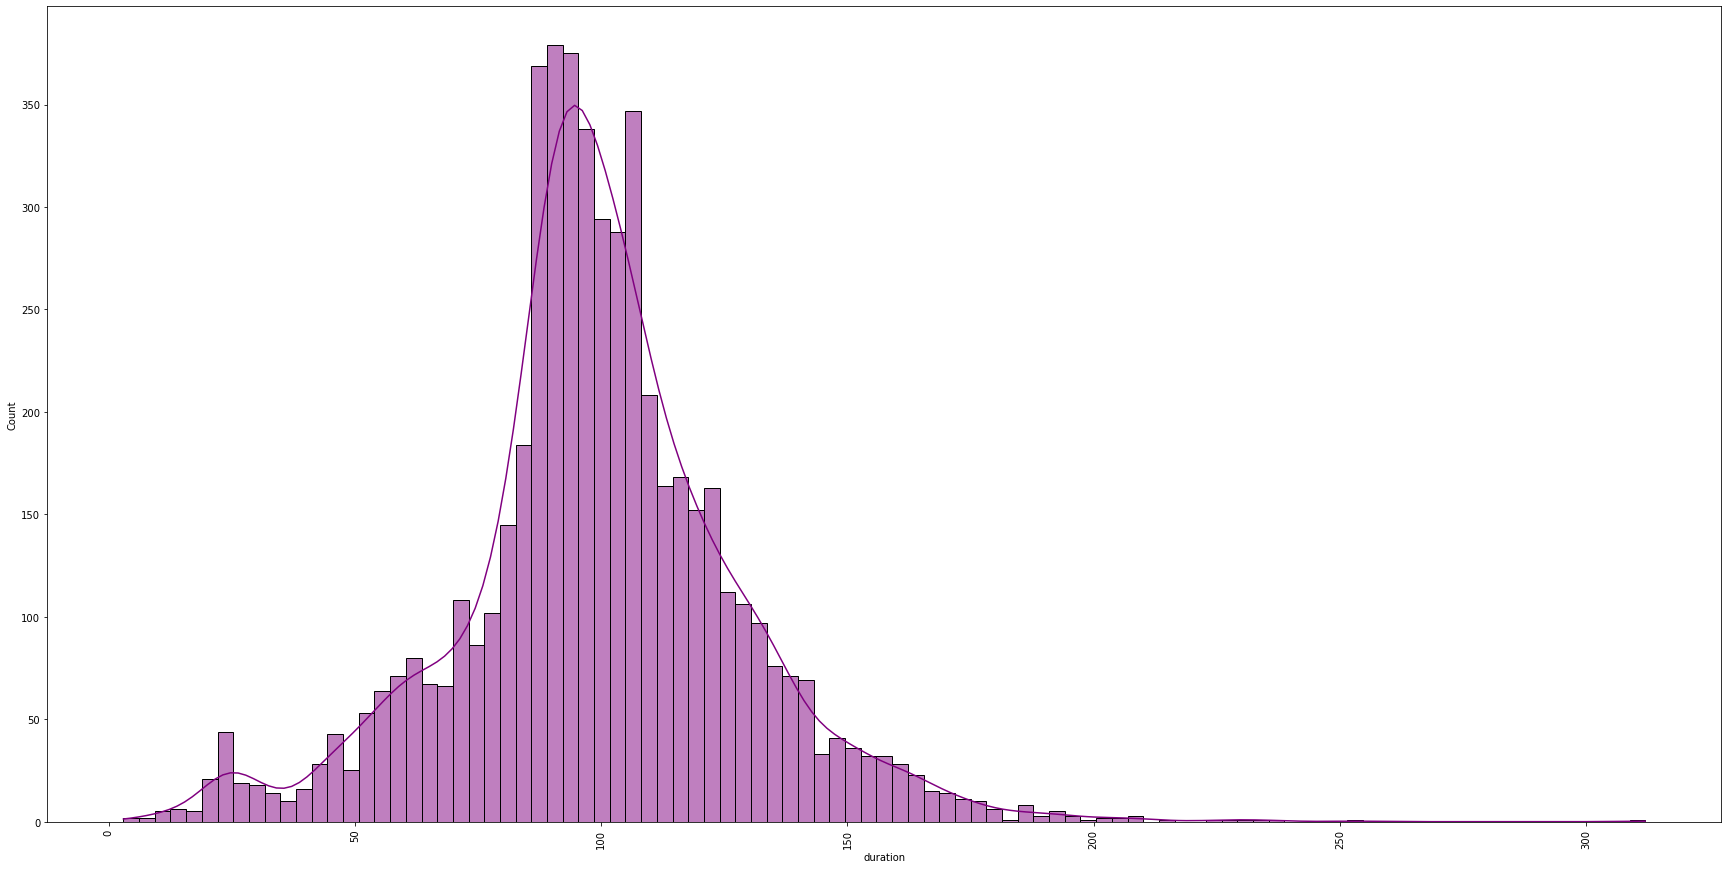

In [77]:
fig = plt.figure(figsize=(30,15))

sns.histplot(df.duration.loc[df.type=="Movie"],kde=True,color='Purple')

plt.xticks(rotation=90);

C:\Users\rodri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

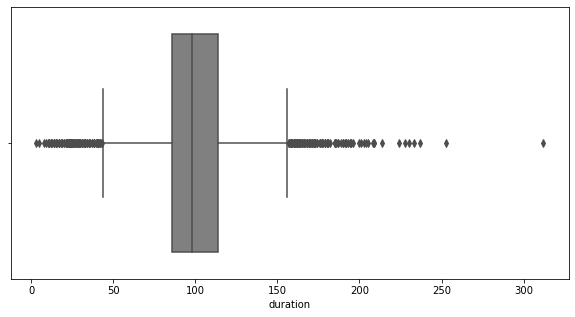

In [78]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df.loc[df.type=="Movie",'duration'],color='gray')

In [79]:
df.loc[df.type=="Movie",'duration'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [80]:
print('Média :', round(df.loc[df.type=="Movie",'duration'].mean(),2))

Média : 99.31


In [81]:
df.loc[df.type=="Movie",'duration'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

## Duração dos TV-Show

<AxesSubplot:xlabel='duration', ylabel='Count'>

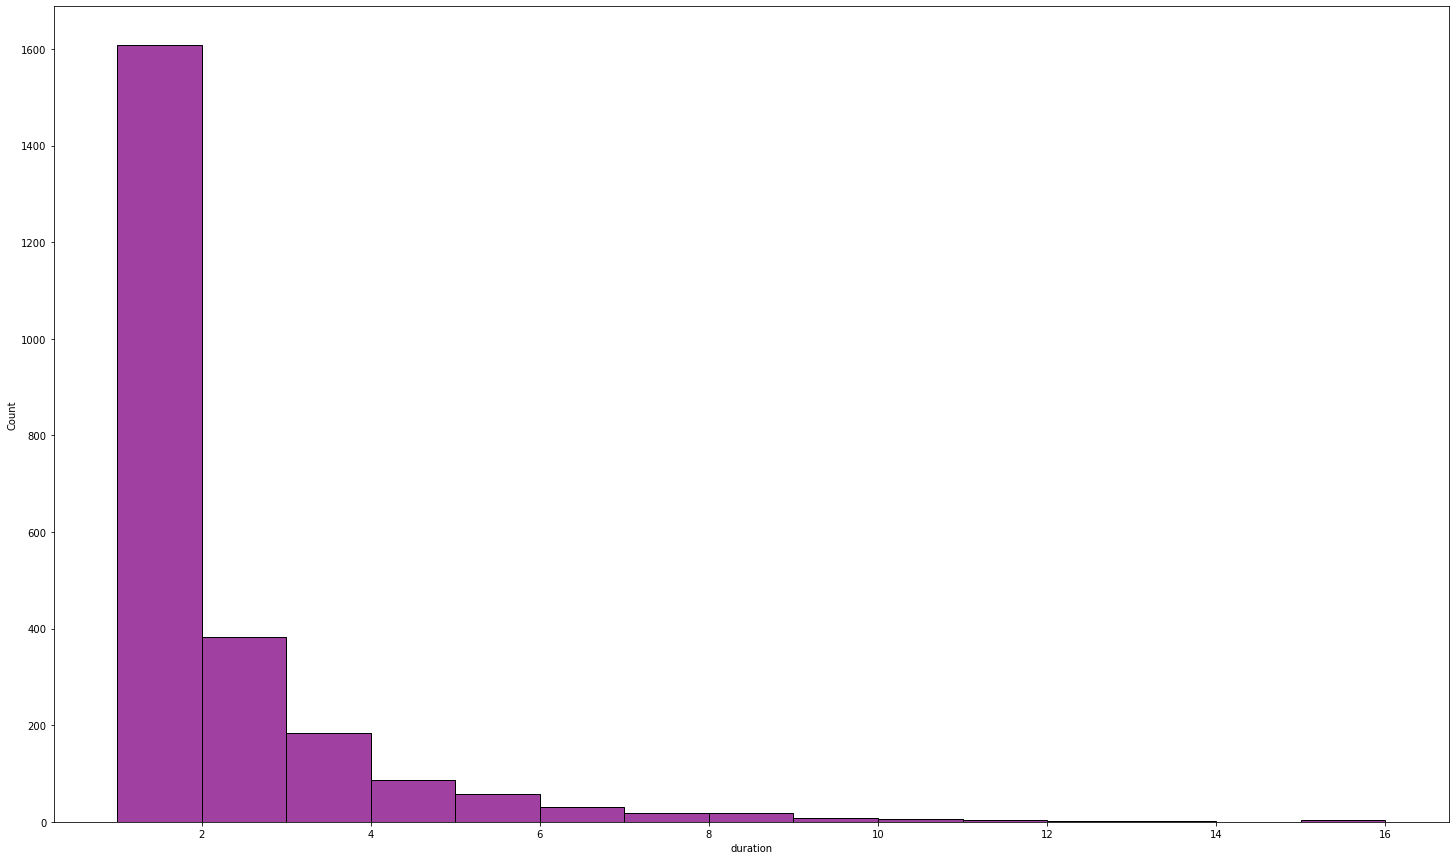

In [82]:
plt.figure(figsize=(25,15))
sns.histplot(df.duration.loc[df.type=="TV Show"],kde=False,color='Purple',bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


<Figure size 1800x1080 with 0 Axes>

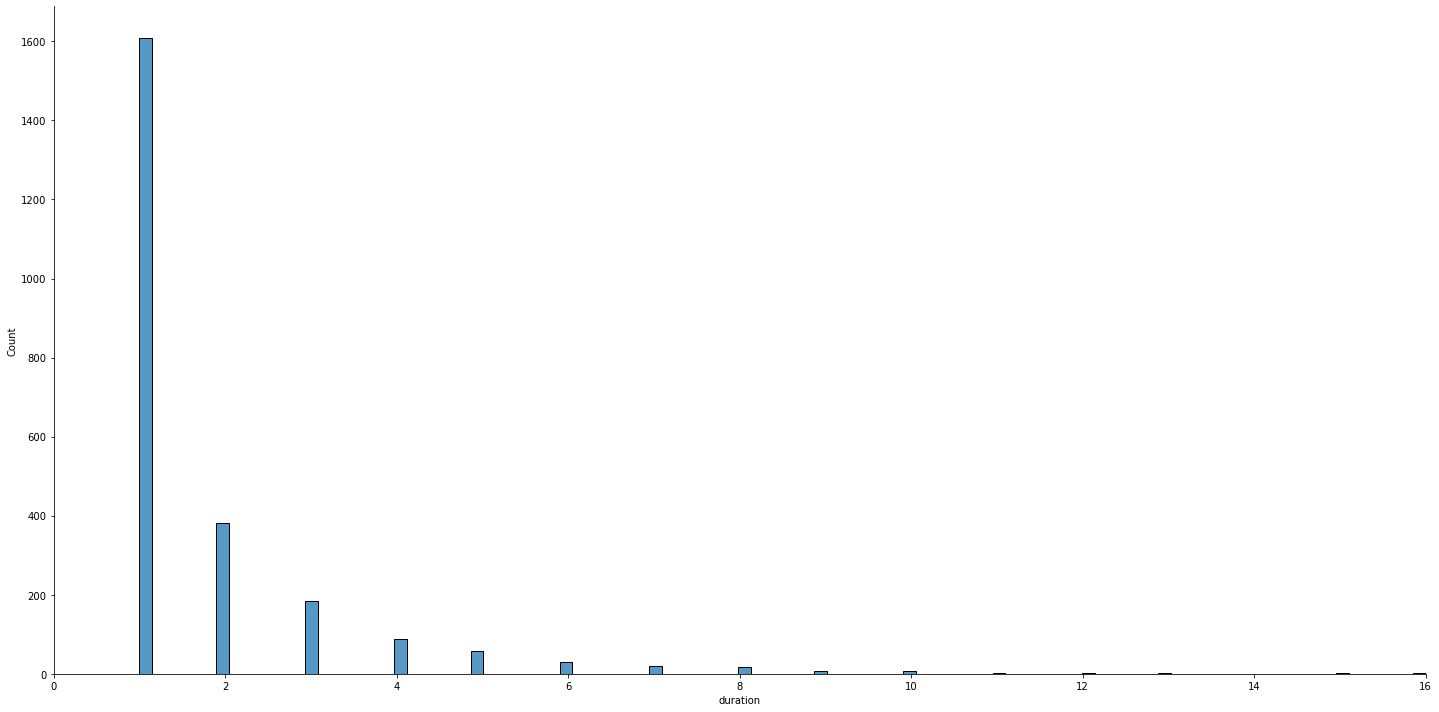

In [83]:
plt.figure(figsize=(25,15))
s = sns.displot(df.duration.loc[df.type=="TV Show"],kind='hist',height=10,aspect=2)
s.set(xlim=(0,16))

In [84]:
df.loc[df.type=="TV Show",'duration'].value_counts(normalize=True)*100

1.0     66.721992
2.0     15.850622
3.0      7.634855
4.0      3.609959
5.0      2.406639
6.0      1.244813
7.0      0.788382
8.0      0.746888
9.0      0.331950
10.0     0.248963
11.0     0.124481
15.0     0.082988
12.0     0.082988
13.0     0.082988
16.0     0.041494
Name: duration, dtype: float64

In [85]:
df.loc[df.type=="TV Show",'duration'].describe()

count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: duration, dtype: float64

A maior parte dos lançamentos duram apenas uma temporada ... porque ? será que são show com pouco sucesso ?

### Conclusão sobre Duração dos conteúdos;



Em média os filmes duram 99 minutos, existem alguns valores( minoria ) que nao fazem sentido. A mediana é 88 minutos, onde encontram a maior parte dos filmes, 
75% dos filmes duram menos de 106 minutos.

Em relação aos TV Shows, a maioria apenas dura 1 temporada e 75% deles tem <=2 temporadas, ou seja normalmente são séries e programas bem curtos, podendo indicar falta de aderência por parte do público

### Listed_in 

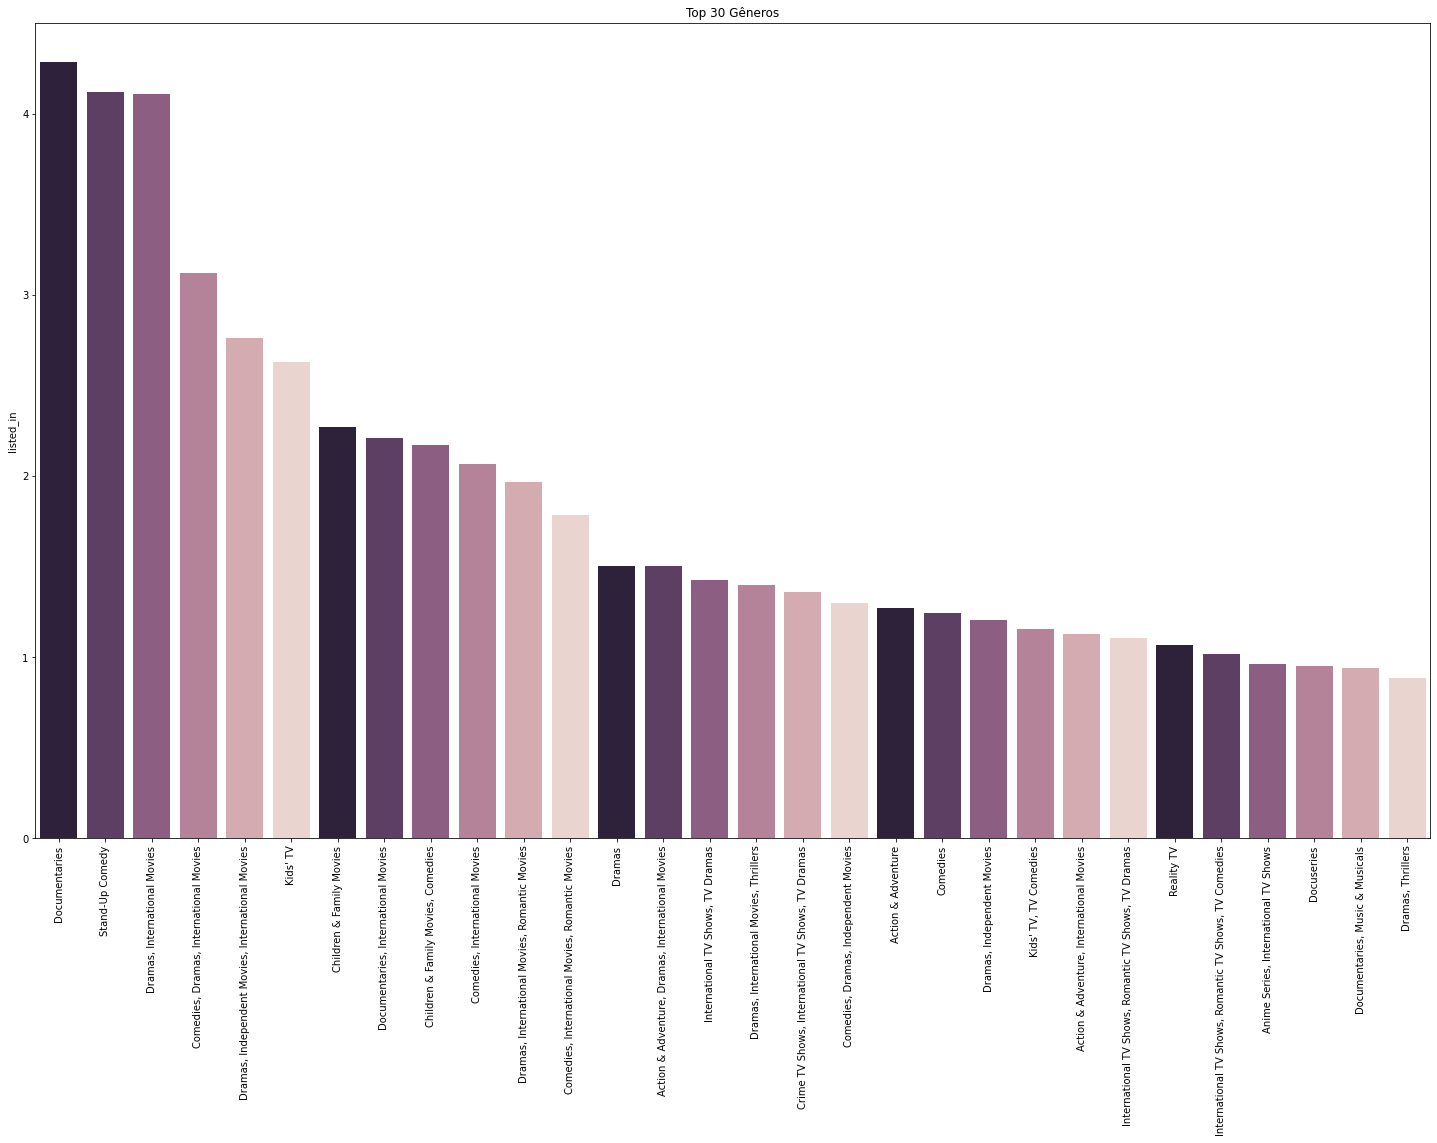

In [86]:
plt.figure(figsize=(25,15))
sns.barplot(x=df['listed_in'].value_counts().head(30).index ,y = df['listed_in'].value_counts(normalize=True).head(30)*100,palette=col).set_title('Top 30 Gêneros');
plt.xticks(rotation=90);

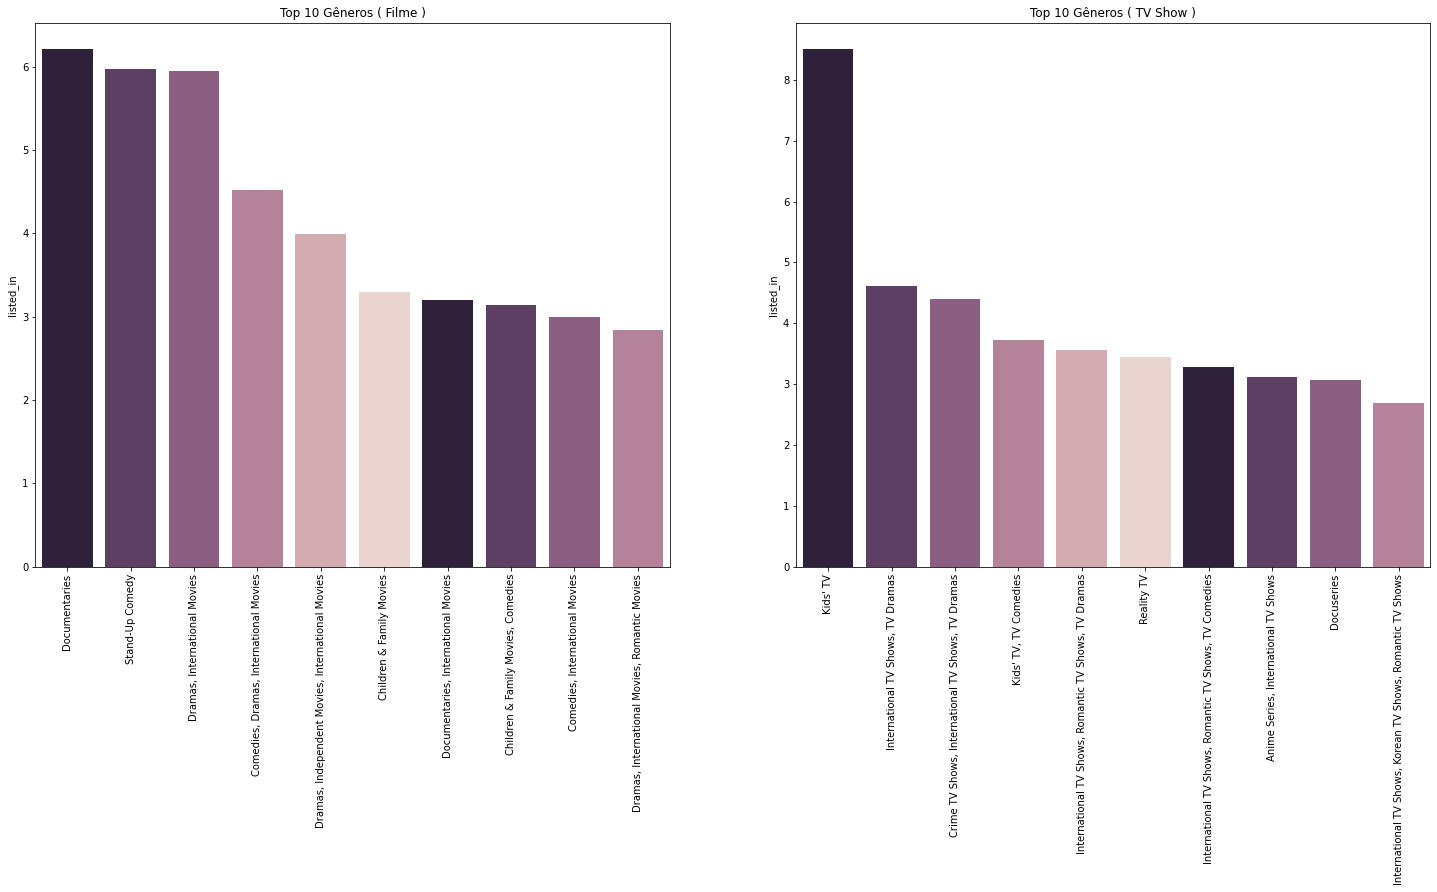

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90)

plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90)

sns.barplot(ax=ax1,x=df.loc[df['type']=='Movie','listed_in'].value_counts().head(10).index ,y = df.loc[df['type']=='Movie','listed_in'].value_counts(normalize=True).head(10)*100,palette=col).set_title('Top 10 Gêneros ( Filme )');
sns.barplot(ax=ax2,x=df.loc[df['type']=='TV Show','listed_in'].value_counts().head(10).index ,y = df.loc[df['type']=='TV Show','listed_in'].value_counts(normalize=True).head(10)*100,palette=col).set_title('Top 10 Gêneros ( TV Show )');


In [88]:
df.loc[df['type']=='TV Show','listed_in'].value_counts(normalize=True).head(10)*100

Kids' TV                                                      8.506224
International TV Shows, TV Dramas                             4.605809
Crime TV Shows, International TV Shows, TV Dramas             4.398340
Kids' TV, TV Comedies                                         3.734440
International TV Shows, Romantic TV Shows, TV Dramas          3.568465
Reality TV                                                    3.443983
International TV Shows, Romantic TV Shows, TV Comedies        3.278008
Anime Series, International TV Shows                          3.112033
Docuseries                                                    3.070539
International TV Shows, Korean TV Shows, Romantic TV Shows    2.697095
Name: listed_in, dtype: float64

### Conclusão:

13% dos gêneros estão em  Documentaries, Stand-Up Comedy, (Dramas, International Movies) de forma global ( Movies e TV Shows ).

Observando proporcionalmente de forma isolada TV Show e Filmes:

### - TV Show:

17 % dos gêneros das séries estão em 8% Kids' TV -  International TV Shows, TV Dramas -  Crime TV Shows, International TV Shows, TV Dramas, ou seja maior
disponibilidade de TV Show para crianças;

### - Filmes

18 % dos gêneros dos filmes estão em  Documentaries, Stand-Up Comedy, (Dramas, International Movies), todos três possuem proporções parecidas.

### Description

Sobre a descrição são dados que descrevem o filme/TV-Show e de alguma forma expressam os seus conteúdos.

Fonte Nuvem Palavras: https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/

In [89]:
df.description.sample(10)

2088    Two former friends, who now live far apart, le...
6308    Eerie things begin to happen after a man gives...
200     The killing of Latasha Harlins became a flashp...
4360    After declaring that he's going to film himsel...
1953    An insomniac, an aspiring photographer and a p...
2099    When a San Francisco exec wins a New Zealand i...
1472    Scott Aukerman brings his popular podcast Come...
4434    Host Chris Packham examines bizarre natural ph...
442     She was twice convicted and acquitted of murde...
2563    At a dysfunctional hospital in Paris, three bu...
Name: description, dtype: object

In [90]:
df.description = df.description.astype('string')

In [91]:
df_wordcloud = df.description.dropna(axis=0)

In [92]:
df_wordcloud.shape

(7787,)

In [93]:
# Concatenando o df.cast em uma string apenas:

all_summary = " ".join(s for s in df_wordcloud)

In [94]:
len(all_summary)

1122109

In [95]:
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800).generate(all_summary)

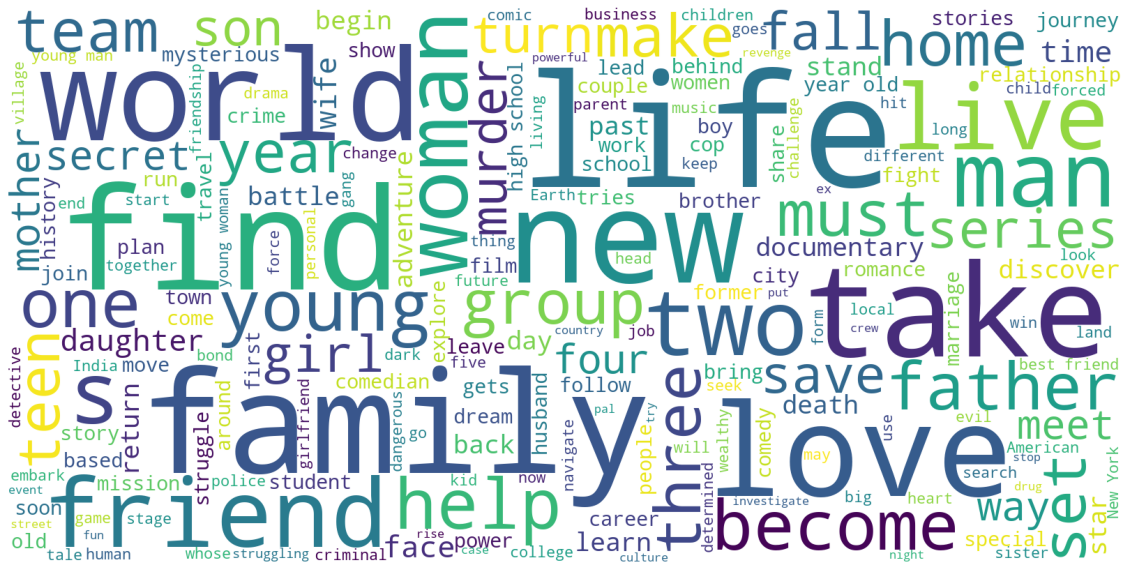

In [97]:
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("Description_summary_wordcloud.png")

# Conclusão sobre description:

Palavras como Family Life, Find, Take, love são as mais frequentes nos filmes e mostram mais frequentes...